In [44]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import math
import chart_studio.plotly as py
#import plotly.graph_objs as go
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics as m
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
import gc
import datetime
import os
#import sql
import time
#from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls
#from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread
import base64
#import psycopg2
#mport textatistic
import requests
from bs4 import BeautifulSoup
%matplotlib inline

In [3]:
data = pd.read_csv('hfi_cc_2018.csv', sep= ',')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [4]:
data.head()

year ISO_code  countries                         region  pf_rol_procedural  pf_rol_civil  pf_rol_criminal    pf_rol  pf_ss_homicide  pf_ss_disappearances_disap  pf_ss_disappearances_violent  pf_ss_disappearances_organized  pf_ss_disappearances_fatalities  pf_ss_disappearances_injuries  pf_ss_disappearances  pf_ss_women_fgm  pf_ss_women_missing  pf_ss_women_inheritance_widows  pf_ss_women_inheritance_daughters  pf_ss_women_inheritance  pf_ss_women     pf_ss  pf_movement_domestic  pf_movement_foreign  pf_movement_women  pf_movement  pf_religion_estop_establish  pf_religion_estop_operate  pf_religion_estop  pf_religion_harassment  pf_religion_restrictions  pf_religion  pf_association_association  pf_association_assembly  pf_association_political_establish  pf_association_political_operate  pf_association_political  pf_association_prof_establish  pf_association_prof_operate  pf_association_prof  pf_association_sport_establish  pf_association_sport_operate  pf_association_sport  \
0  2016      ALB    Albania                 Eastern Europe           6.661503      4.547244         4.666508  5.291752        8.920429                        10.0                      10.00000                            10.0                        10.000000                      10.000000             10.000000             10.0                  7.5                             5.0                                5.0                      5.0     7.500000  8.806810                   5.0                 10.0                5.0     6.666667                          NaN                        NaN               10.0                9.566667                  8.011111     9.192593                        10.0                     10.0                                 NaN                               NaN                      10.0                            NaN                          NaN                 10.0                             NaN                           NaN                  10.0   
1  2016      DZA    Algeria     Middle East & North Africa                NaN           NaN              NaN  3.819566        9.456254                        10.0                       9.29403                             5.0                         9.926119                       9.990149              8.842060             10.0                  7.5                             0.0                                0.0                      0.0     5.833333  8.043882                   5.0                  5.0                5.0     5.000000                          NaN                        NaN                5.0                6.873333                  2.961111     4.944815                         5.0                      5.0                                 NaN                               NaN                       5.0                            NaN                          NaN                  5.0                             NaN                           NaN                   5.0   
2  2016      AGO     Angola             Sub-Saharan Africa                NaN           NaN              NaN  3.451814        8.060260                         5.0                      10.00000                             7.5                        10.000000                      10.000000              8.500000             10.0                 10.0                             5.0                                5.0                      5.0     8.333333  8.297865                   0.0                  5.0               10.0     5.000000                          NaN                        NaN               10.0                8.904444                  7.455556     8.786667                         2.5                      2.5                                 NaN                               NaN                       2.5                            NaN                          NaN                  5.0                             NaN                           NaN                   7.5   
3  2016      ARG  Argentina

# https://www.kaggle.com/gsutters/the-human-freedom-index

About this file
The Human Freedom Index presents a broad measure of human freedom, understood as the absence of coercive constraint. It uses 79 distinct indicators of personal and economic freedom in the following areas:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

The HFI is the most comprehensive freedom index so far created for a globally meaningful set of countries. The HFI covers 162 countries for 2016, the most recent year for which sufficient data are available and it includes three countries -Belarus, Iraq, and Sudan- that were added this year. The index ranks countries beginning in 2008, the earliest year for which a robust enough index could be produced.

# The main purpose of this data analysis is to gain insights into the complexities of economic and human freedom on an international level. My target variables that I will be using are the last 5 columns in the dataframe: economic freedom score & rank, and human freedom & rank. I will be varying the scope of my analysis from broad international and continential comparison, down to individual countries and regions. Do certain continents or regions value one freedom over the other, and ipso facto what is the historical and cultural context that might explain it?

#    columns
    year
    ISO_code
    countries
    region
    pf_rol_procedural = Procedural justice
    pf_rol_civil = Civil justice
    pf_rol_criminal = Criminal justice
    pf_rol = Rule of law
    pf_ss_homicide = Homicide
    pf_ss_disappearances_disap = Disappearances
    pf_ss_disappearances_violent = Violent conflicts
    pf_ss_disappearances_organized = Organized conflicts
    pf_ss_disappearances_fatalities = Terrorism fatalities
    pf_ss_disappearances_injuries = Terrorism injuries
    pf_ss_disappearances = Disappearances, conflict, and terrorism
    pf_ss_women_fgm = Female genital mutilation
    pf_ss_women_missing = Missing women
    pf_ss_women_inheritance_widows = Inheritance rights for widows
    pf_ss_women_inheritance_daughters = Inheritance rights for daughters
    pf_ss_women_inheritance = Inheritance
    pf_ss_women = Women's security
    pf_ss = Security and safety
    pf_movement_domestic = Freedom of domestic movement
    pf_movement_foreign = Freedom of foreign movement
    pf_movement_women = Women's movement
    pf_movement = Freedom of movement
    pf_religion_estop_establish = Freedom to establish religious organizations
    pf_religion_estop_operate = Freedom to operate religious organizations
    pf_religion_estop = Freedom to establish and operate religious organizations
    pf_religion_harassment = Harassment and physical hostilities
    pf_religion_restrictions = Legal and regulatory restrictions
    pf_religion = Religious freedom
    pf_association_association = Freedom of association
    pf_association_assembly = Freedom of assembly
    pf_association_political_establish = Freedom to establish political parties
    pf_association_political_operate = Freedom to operate political parties
    pf_association_political = Freedom to establish and operate political parties
    pf_association_prof_establish = Freedom to establish professional organizations
    pf_association_prof_operate = Freedom to operate professional organizations
    pf_association_prof = Freedom to establish and operate professional organizations
    pf_association_sport_establish = Freedom to establish educational, sporting, and cultural organizations
    pf_association_sport_operate = Freedom to operate educational, sporting, and cultural organizations
    pf_association_sport = Freedom to establish and operate educational, sporting, and cultural organizations
    pf_association = Freedom to associate and assemble with peaceful individuals or organizations
    pf_expression_killed = Press killed
    pf_expression_jailed = Press jailed
    pf_expression_influence = Laws and regulations that influence media content
    pf_expression_control = Political pressures and controls on media content
    pf_expression_cable = Access to cable/satellite
    pf_expression_newspapers = Access to foreign newspapers
    pf_expression_internet = State control over Internet access
    pf_expression = Freedom of expression
    pf_identity_legal = Legal gender
    pf_identity_parental_marriage = Parental rights in marriage
    pf_identity_parental_divorce = Parental rights after divorce
    pf_identity_parental = Parental rights
    pf_identity_sex_male = Male-to-male relationships
    pf_identity_sex_female = Female-to-female relationships
    pf_identity_sex = Same-sex ralitionships
    pf_identity_divorce = Divorce
    pf_identity = Identity and relationships
    pf_scorePersonal = Freedom (score)
    pf_rankPersonal = Freedom (rank)
    ef_government_consumption = Government consumption
    ef_government_transfers = Transfers and subsidies
    ef_government_enterprises = Government enterprises and investments
    ef_government_tax_income = Top marginal income tax rate
    ef_government_tax_payroll = Top marginal income and payroll tax rate
    ef_government_tax = Top marginal tax rate
    ef_government = Size of government
    ef_legal_judicial = Judicial independence
    ef_legal_courts = Impartial courts
    ef_legal_protection = Protection of property rights
    ef_legal_military = Military interference in rule of law and politics
    ef_legal_integrity = Integrity of the legal system
    ef_legal_enforcement = Legal enforcement of contracts
    ef_legal_restrictions = Regulatory restrictions on the sale of real property
    ef_legal_police = Reliability of police
    ef_legal_crime = Business costs of crime
    ef_legal_gender = Gender adjustment
    ef_legal = Legal system and property rights
    ef_money_growth = Money growth
    ef_money_sd = Standard deviation of inflation
    ef_money_inflation = Inflation: most recent year
    ef_money_currency = Freedom to own foreign currency bank account
    ef_money = Sound money
    ef_trade_tariffs_revenue = Revenue from trade taxes (% of trade sector)
    ef_trade_tariffs_mean = Mean tariff rate
    ef_trade_tariffs_sd = Standard deviation of tariffs rates
    ef_trade_tariffs = Tariffs
    ef_trade_regulatory_nontariff = Nontariff trade barriers
    ef_trade_regulatory_compliance = Compliance costs of importing and exporting
    ef_trade_regulatory = Regulatory trade barriers
    ef_trade_black = Black-market exchange rates
    ef_trade_movement_foreign = Foreign ownership/investment restrictions
    ef_trade_movement_capital = Capital controls
    ef_trade_movement_visit = Freedom of foreigners to visit
    ef_trade_movement = Controls of the movement of capital and people
    ef_trade = Freedom to trade internationally
    ef_regulation_credit_ownership = Ownership of banks
    ef_regulation_credit_private = Private sector credit
    ef_regulation_credit_interest = Interest rate controls
    ef_regulation_credit = Credit market regulations
    ef_regulation_labor_minwage = Hiring regulations and minimum wage
    ef_regulation_labor_firing = Hiring and firing regulations
    ef_regulation_labor_bargain = Centralized collective bargaining
    ef_regulation_labor_hours = Hours regulations
    ef_regulation_labor_dismissal = Mandated cost of worker dismissal
    ef_regulation_labor_conscription = Conscription
    ef_regulation_labor = Labor market regulations
    ef_regulation_business_adm = Administrative requirements
    ef_regulation_business_bureaucracy = Bureaucracy costs
    ef_regulation_business_start = Starting a business
    ef_regulation_business_bribes = Extra payments/bribes/favoritism
    ef_regulation_business_licensing = Licensing restrictions
    ef_regulation_business_compliance = Cost of tax compliance
    ef_regulation_business = Business regulations
    ef_regulation = Regulation
    ef_score = Economic Freedom (score)
    ef_rank = Economic Freedom (rank)
    hf_score = Human Freedom (score)
    hf_rank = Human Freedom (rank)
    hf_quartile = Human Freedom (quartile)

In [5]:
data.dtypes

year                                    int64
ISO_code                               object
countries                              object
region                                 object
pf_rol_procedural                     float64
pf_rol_civil                          float64
pf_rol_criminal                       float64
pf_rol                                float64
pf_ss_homicide                        float64
pf_ss_disappearances_disap            float64
pf_ss_disappearances_violent          float64
pf_ss_disappearances_organized        float64
pf_ss_disappearances_fatalities       float64
pf_ss_disappearances_injuries         float64
pf_ss_disappearances                  float64
pf_ss_women_fgm                       float64
pf_ss_women_missing                   float64
pf_ss_women_inheritance_widows        float64
pf_ss_women_inheritance_daughters     float64
pf_ss_women_inheritance               float64
pf_ss_women                           float64
pf_ss                             

In [6]:
data.head()

year ISO_code  countries                         region  pf_rol_procedural  pf_rol_civil  pf_rol_criminal    pf_rol  pf_ss_homicide  pf_ss_disappearances_disap  pf_ss_disappearances_violent  pf_ss_disappearances_organized  pf_ss_disappearances_fatalities  pf_ss_disappearances_injuries  pf_ss_disappearances  pf_ss_women_fgm  pf_ss_women_missing  pf_ss_women_inheritance_widows  pf_ss_women_inheritance_daughters  pf_ss_women_inheritance  pf_ss_women     pf_ss  pf_movement_domestic  pf_movement_foreign  pf_movement_women  pf_movement  pf_religion_estop_establish  pf_religion_estop_operate  pf_religion_estop  pf_religion_harassment  pf_religion_restrictions  pf_religion  pf_association_association  pf_association_assembly  pf_association_political_establish  pf_association_political_operate  pf_association_political  pf_association_prof_establish  pf_association_prof_operate  pf_association_prof  pf_association_sport_establish  pf_association_sport_operate  pf_association_sport  \
0  2016      ALB    Albania                 Eastern Europe           6.661503      4.547244         4.666508  5.291752        8.920429                        10.0                      10.00000                            10.0                        10.000000                      10.000000             10.000000             10.0                  7.5                             5.0                                5.0                      5.0     7.500000  8.806810                   5.0                 10.0                5.0     6.666667                          NaN                        NaN               10.0                9.566667                  8.011111     9.192593                        10.0                     10.0                                 NaN                               NaN                      10.0                            NaN                          NaN                 10.0                             NaN                           NaN                  10.0   
1  2016      DZA    Algeria     Middle East & North Africa                NaN           NaN              NaN  3.819566        9.456254                        10.0                       9.29403                             5.0                         9.926119                       9.990149              8.842060             10.0                  7.5                             0.0                                0.0                      0.0     5.833333  8.043882                   5.0                  5.0                5.0     5.000000                          NaN                        NaN                5.0                6.873333                  2.961111     4.944815                         5.0                      5.0                                 NaN                               NaN                       5.0                            NaN                          NaN                  5.0                             NaN                           NaN                   5.0   
2  2016      AGO     Angola             Sub-Saharan Africa                NaN           NaN              NaN  3.451814        8.060260                         5.0                      10.00000                             7.5                        10.000000                      10.000000              8.500000             10.0                 10.0                             5.0                                5.0                      5.0     8.333333  8.297865                   0.0                  5.0               10.0     5.000000                          NaN                        NaN               10.0                8.904444                  7.455556     8.786667                         2.5                      2.5                                 NaN                               NaN                       2.5                            NaN                          NaN                  5.0                             NaN                           NaN                   7.5   
3  2016      ARG  Argentina

In [7]:
info = ['year', 'ISO_code', 'countries', 'region','ef_score', 'ef_rank', 'hf_score', 'hf_rank', 'hf_quartile']
data_pf = pd.DataFrame()
data_ef = pd.DataFrame()
for columns in data.columns:
    if 'pf' in columns:
        data_pf[columns] = data[columns]
    if columns in info:
        data_pf[columns] = data[columns]
for columns in data.columns:
    if 'ef' in columns:
        data_ef[columns] = data[columns]
    if columns in info:
        data_ef[columns] = data[columns]

In [8]:
data_pf.head()

year ISO_code  countries                         region  pf_rol_procedural  pf_rol_civil  pf_rol_criminal    pf_rol  pf_ss_homicide  pf_ss_disappearances_disap  pf_ss_disappearances_violent  pf_ss_disappearances_organized  pf_ss_disappearances_fatalities  pf_ss_disappearances_injuries  pf_ss_disappearances  pf_ss_women_fgm  pf_ss_women_missing  pf_ss_women_inheritance_widows  pf_ss_women_inheritance_daughters  pf_ss_women_inheritance  pf_ss_women     pf_ss  pf_movement_domestic  pf_movement_foreign  pf_movement_women  pf_movement  pf_religion_estop_establish  pf_religion_estop_operate  pf_religion_estop  pf_religion_harassment  pf_religion_restrictions  pf_religion  pf_association_association  pf_association_assembly  pf_association_political_establish  pf_association_political_operate  pf_association_political  pf_association_prof_establish  pf_association_prof_operate  pf_association_prof  pf_association_sport_establish  pf_association_sport_operate  pf_association_sport  \
0  2016      ALB    Albania                 Eastern Europe           6.661503      4.547244         4.666508  5.291752        8.920429                        10.0                      10.00000                            10.0                        10.000000                      10.000000             10.000000             10.0                  7.5                             5.0                                5.0                      5.0     7.500000  8.806810                   5.0                 10.0                5.0     6.666667                          NaN                        NaN               10.0                9.566667                  8.011111     9.192593                        10.0                     10.0                                 NaN                               NaN                      10.0                            NaN                          NaN                 10.0                             NaN                           NaN                  10.0   
1  2016      DZA    Algeria     Middle East & North Africa                NaN           NaN              NaN  3.819566        9.456254                        10.0                       9.29403                             5.0                         9.926119                       9.990149              8.842060             10.0                  7.5                             0.0                                0.0                      0.0     5.833333  8.043882                   5.0                  5.0                5.0     5.000000                          NaN                        NaN                5.0                6.873333                  2.961111     4.944815                         5.0                      5.0                                 NaN                               NaN                       5.0                            NaN                          NaN                  5.0                             NaN                           NaN                   5.0   
2  2016      AGO     Angola             Sub-Saharan Africa                NaN           NaN              NaN  3.451814        8.060260                         5.0                      10.00000                             7.5                        10.000000                      10.000000              8.500000             10.0                 10.0                             5.0                                5.0                      5.0     8.333333  8.297865                   0.0                  5.0               10.0     5.000000                          NaN                        NaN               10.0                8.904444                  7.455556     8.786667                         2.5                      2.5                                 NaN                               NaN                       2.5                            NaN                          NaN                  5.0                             NaN                           NaN                   7.5   
3  2016      ARG  Argentina

In [9]:
data_pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 68 columns):
year                                  1458 non-null int64
ISO_code                              1458 non-null object
countries                             1458 non-null object
region                                1458 non-null object
pf_rol_procedural                     880 non-null float64
pf_rol_civil                          880 non-null float64
pf_rol_criminal                       880 non-null float64
pf_rol                                1378 non-null float64
pf_ss_homicide                        1378 non-null float64
pf_ss_disappearances_disap            1369 non-null float64
pf_ss_disappearances_violent          1378 non-null float64
pf_ss_disappearances_organized        1279 non-null float64
pf_ss_disappearances_fatalities       1378 non-null float64
pf_ss_disappearances_injuries         1378 non-null float64
pf_ss_disappearances                  1378 non-null float64
p

In [10]:
data_ef.head()

year ISO_code  countries                         region  ef_government_consumption  ef_government_transfers  ef_government_enterprises  ef_government_tax_income  ef_government_tax_payroll  ef_government_tax  ef_government  ef_legal_judicial  ef_legal_courts  ef_legal_protection  ef_legal_military  ef_legal_integrity  ef_legal_enforcement  ef_legal_restrictions  ef_legal_police  ef_legal_crime  ef_legal_gender  ef_legal  ef_money_growth  ef_money_sd  ef_money_inflation  ef_money_currency  ef_money  ef_trade_tariffs_revenue  ef_trade_tariffs_mean  ef_trade_tariffs_sd  ef_trade_tariffs  ef_trade_regulatory_nontariff  ef_trade_regulatory_compliance  ef_trade_regulatory  ef_trade_black  ef_trade_movement_foreign  ef_trade_movement_capital  ef_trade_movement_visit  ef_trade_movement  ef_trade  ef_regulation_credit_ownership  ef_regulation_credit_private  ef_regulation_credit_interest  ef_regulation_credit  ef_regulation_labor_minwage  ef_regulation_labor_firing  \
0  2016      ALB    Albania                 Eastern Europe                   8.232353                 7.509902                        8.0                       9.0                        7.0                8.0       7.935564           2.668222         3.145462             4.512228           8.333333            4.166667              4.387444               6.485287         6.933500        6.215401         0.948718  5.071814         8.986454     9.484575             9.74360               10.0  9.553657                  9.626667                   9.24               8.0240          8.963556                       5.574481                        9.405328             7.489905        10.00000                   6.306106                   4.615385                 8.296923           6.406138  8.214900                             5.0                      7.295687                            9.0              7.098562                     5.566667                    5.396399   
1  2016      DZA    Algeria     Middle East & North Africa                   2.150000                 7.817129                        0.0                       7.0                        2.0                4.5       3.616782           4.186704         4.327113             4.689952           4.166667            5.000000              4.507538               6.626692         6.136845        6.737383         0.820513  4.690743         6.955962     8.339152             8.72046                5.0  7.253894                  8.480000                   6.22               5.9176          6.872533                       4.962589                        0.000000             2.481294         5.56391                   3.664829                   0.000000                 1.106256           1.590362  4.127025                             0.0                      5.301526                           10.0              5.100509                     5.566667                    3.896912   
2  2016      AGO     Angola             Sub-Saharan Africa                   7.600000                 8.886739                        0.0                      10.0                        9.0                9.5       6.496685           1.843129         1.974566             2.512364           3.333333            4.166667              2.302200               5.455882         3.016104        4.291197         0.846154  2.963635         9.385679     4.986742             3.05400                5.0  5.606605                  8.993333                   7.72               4.2544          6.989244                       3.132738                        0.917160             2.024949        10.00000                   2.946919                   3.076923                 0.110626           2.044823  5.264754                             8.0                      9.194715                            4.0              7.064905                     8.900000                    2.656198   
3  2016      ARG  Argentina  Latin America & the Caribbean                   5.335294              

In [11]:
data.describe(include ='all')

year ISO_code countries              region  pf_rol_procedural  pf_rol_civil  pf_rol_criminal       pf_rol  pf_ss_homicide  pf_ss_disappearances_disap  pf_ss_disappearances_violent  pf_ss_disappearances_organized  pf_ss_disappearances_fatalities  pf_ss_disappearances_injuries  pf_ss_disappearances  pf_ss_women_fgm  pf_ss_women_missing  pf_ss_women_inheritance_widows  pf_ss_women_inheritance_daughters  pf_ss_women_inheritance  pf_ss_women        pf_ss  pf_movement_domestic  pf_movement_foreign  pf_movement_women  pf_movement  pf_religion_estop_establish  pf_religion_estop_operate  pf_religion_estop  pf_religion_harassment  pf_religion_restrictions  pf_religion  pf_association_association  pf_association_assembly  pf_association_political_establish  pf_association_political_operate  pf_association_political  pf_association_prof_establish  pf_association_prof_operate  pf_association_prof  pf_association_sport_establish  pf_association_sport_operate  pf_association_sport  \
count   1458.000000     1458      1458                1458         880.000000    880.000000       880.000000  1378.000000     1378.000000                 1369.000000                   1378.000000                     1279.000000                      1378.000000                    1378.000000           1378.000000      1286.000000          1338.000000                      917.000000                         917.000000              1339.000000  1358.000000  1378.000000           1360.000000          1360.000000        1317.000000  1378.000000                   727.000000                 727.000000        1129.000000             1364.000000               1364.000000  1368.000000                 1129.000000              1129.000000                          727.000000                        727.000000               1129.000000                     727.000000                   727.000000          1129.000000                      727.000000                    727.000000           1129.000000   
unique          NaN      162       162                  10                NaN           NaN              NaN          NaN             NaN                         NaN                           NaN                             NaN                              NaN                            NaN                   NaN              NaN                  NaN                             NaN                                NaN                      NaN          NaN          NaN                   NaN                  NaN                NaN          NaN                          NaN                        NaN                NaN                     NaN                       NaN          NaN                         NaN                      NaN                                 NaN                               NaN                       NaN                            NaN                          NaN                  NaN                             NaN                           NaN                   NaN   
top             NaN      TJK     Malta  Sub-Saharan Africa                NaN           NaN              NaN          NaN             NaN                         NaN                           NaN                             NaN                              NaN                            NaN                   NaN              NaN                  NaN                             NaN                                NaN                      NaN          NaN          NaN                   NaN                  NaN                NaN          NaN                          NaN                        NaN                NaN                     NaN                       NaN          NaN                         NaN                      NaN                                 NaN                               NaN                       NaN                            NaN                          NaN                  NaN                             NaN                           NaN                   NaN   
freq           

In [12]:
data['year'].unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008], dtype=int64)

In [13]:
data['region'].unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

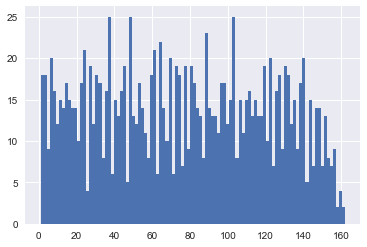

In [14]:
data['ef_rank'].hist(bins = 100)

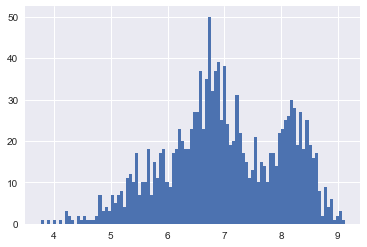

In [15]:
data['hf_score'].hist(bins = 100)

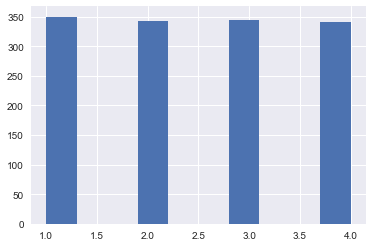

In [16]:
data['hf_quartile'].hist(bins = 10)

In [17]:
data.corr()

year  pf_rol_procedural  pf_rol_civil  pf_rol_criminal    pf_rol  pf_ss_homicide  pf_ss_disappearances_disap  pf_ss_disappearances_violent  pf_ss_disappearances_organized  pf_ss_disappearances_fatalities  pf_ss_disappearances_injuries  pf_ss_disappearances  pf_ss_women_fgm  pf_ss_women_missing  pf_ss_women_inheritance_widows  pf_ss_women_inheritance_daughters  pf_ss_women_inheritance  pf_ss_women     pf_ss  pf_movement_domestic  pf_movement_foreign  pf_movement_women  pf_movement  pf_religion_estop_establish  pf_religion_estop_operate  pf_religion_estop  pf_religion_harassment  pf_religion_restrictions  pf_religion  pf_association_association  pf_association_assembly  pf_association_political_establish  pf_association_political_operate  pf_association_political  pf_association_prof_establish  pf_association_prof_operate  pf_association_prof  pf_association_sport_establish  pf_association_sport_operate  pf_association_sport  pf_association  \
year                                1.000000          -0.040021      0.017424        -0.083533 -0.100740        0.035822                   -0.054656                     -0.032111                       -0.050714                        -0.139561                      -0.126839             -0.093380         0.023746            -0.037150                       -0.069353                          -0.065165                -0.158812    -0.125599 -0.071220              0.015742             0.015410          -0.190818    -0.063478                    -0.063159                   0.063401          -0.026416               -0.161419                 -0.140234    -0.125524                   -0.032217                -0.041866                            0.035947                          0.126776                 -0.022940                      -0.086312                     0.024986            -0.088609                       -0.085555                      0.169671              0.013471       -0.036250   
pf_rol_procedural                  -0.040021           1.000000      0.811917         0.852986  0.892389        0.342438                    0.435563                      0.218577                        0.624633                         0.178221                       0.154079              0.519951         0.276931             0.331690                        0.550612                           0.568518                 0.574684     0.585248  0.691434              0.457958             0.389534           0.482103     0.570552                     0.462684                   0.485140           0.496558                0.091211                  0.107299     0.367660                    0.528020                 0.553075                            0.446188                          0.532122                  0.561042                       0.394397                     0.572221             0.508847                        0.415707                      0.459881              0.470484        0.591844   
pf_rol_civil                        0.017424           0.811917      1.000000         0.881463  0.826607        0.362162                    0.307679                      0.142571                        0.494409                         0.147816                       0.137162              0.393009         0.193187             0.235151                        0.351819                           0.362813                 0.370810     0.388441  0.575849              0.305392             0.220678           0.337819     0.371483                     0.349687                   0.350747           0.346953                0.019245                  0.044998     0.228918                    0.394854                 0.397559                            0.364842                          0.438403                  0.427506                       0.372367                     0.525499             0.459221                        0.318745                      0.398787              0.362763        0.458903   
pf_rol_criminal                    -0.083533           0

# The correlation heatmap for the whole data set is more akin to modern art than it is to a useful visualization. But it does serve as good example of why feature selection for big data is important.

In [18]:
corr = data.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':13})
fig=plt.gcf()
fig.set_size_inches(21,19)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


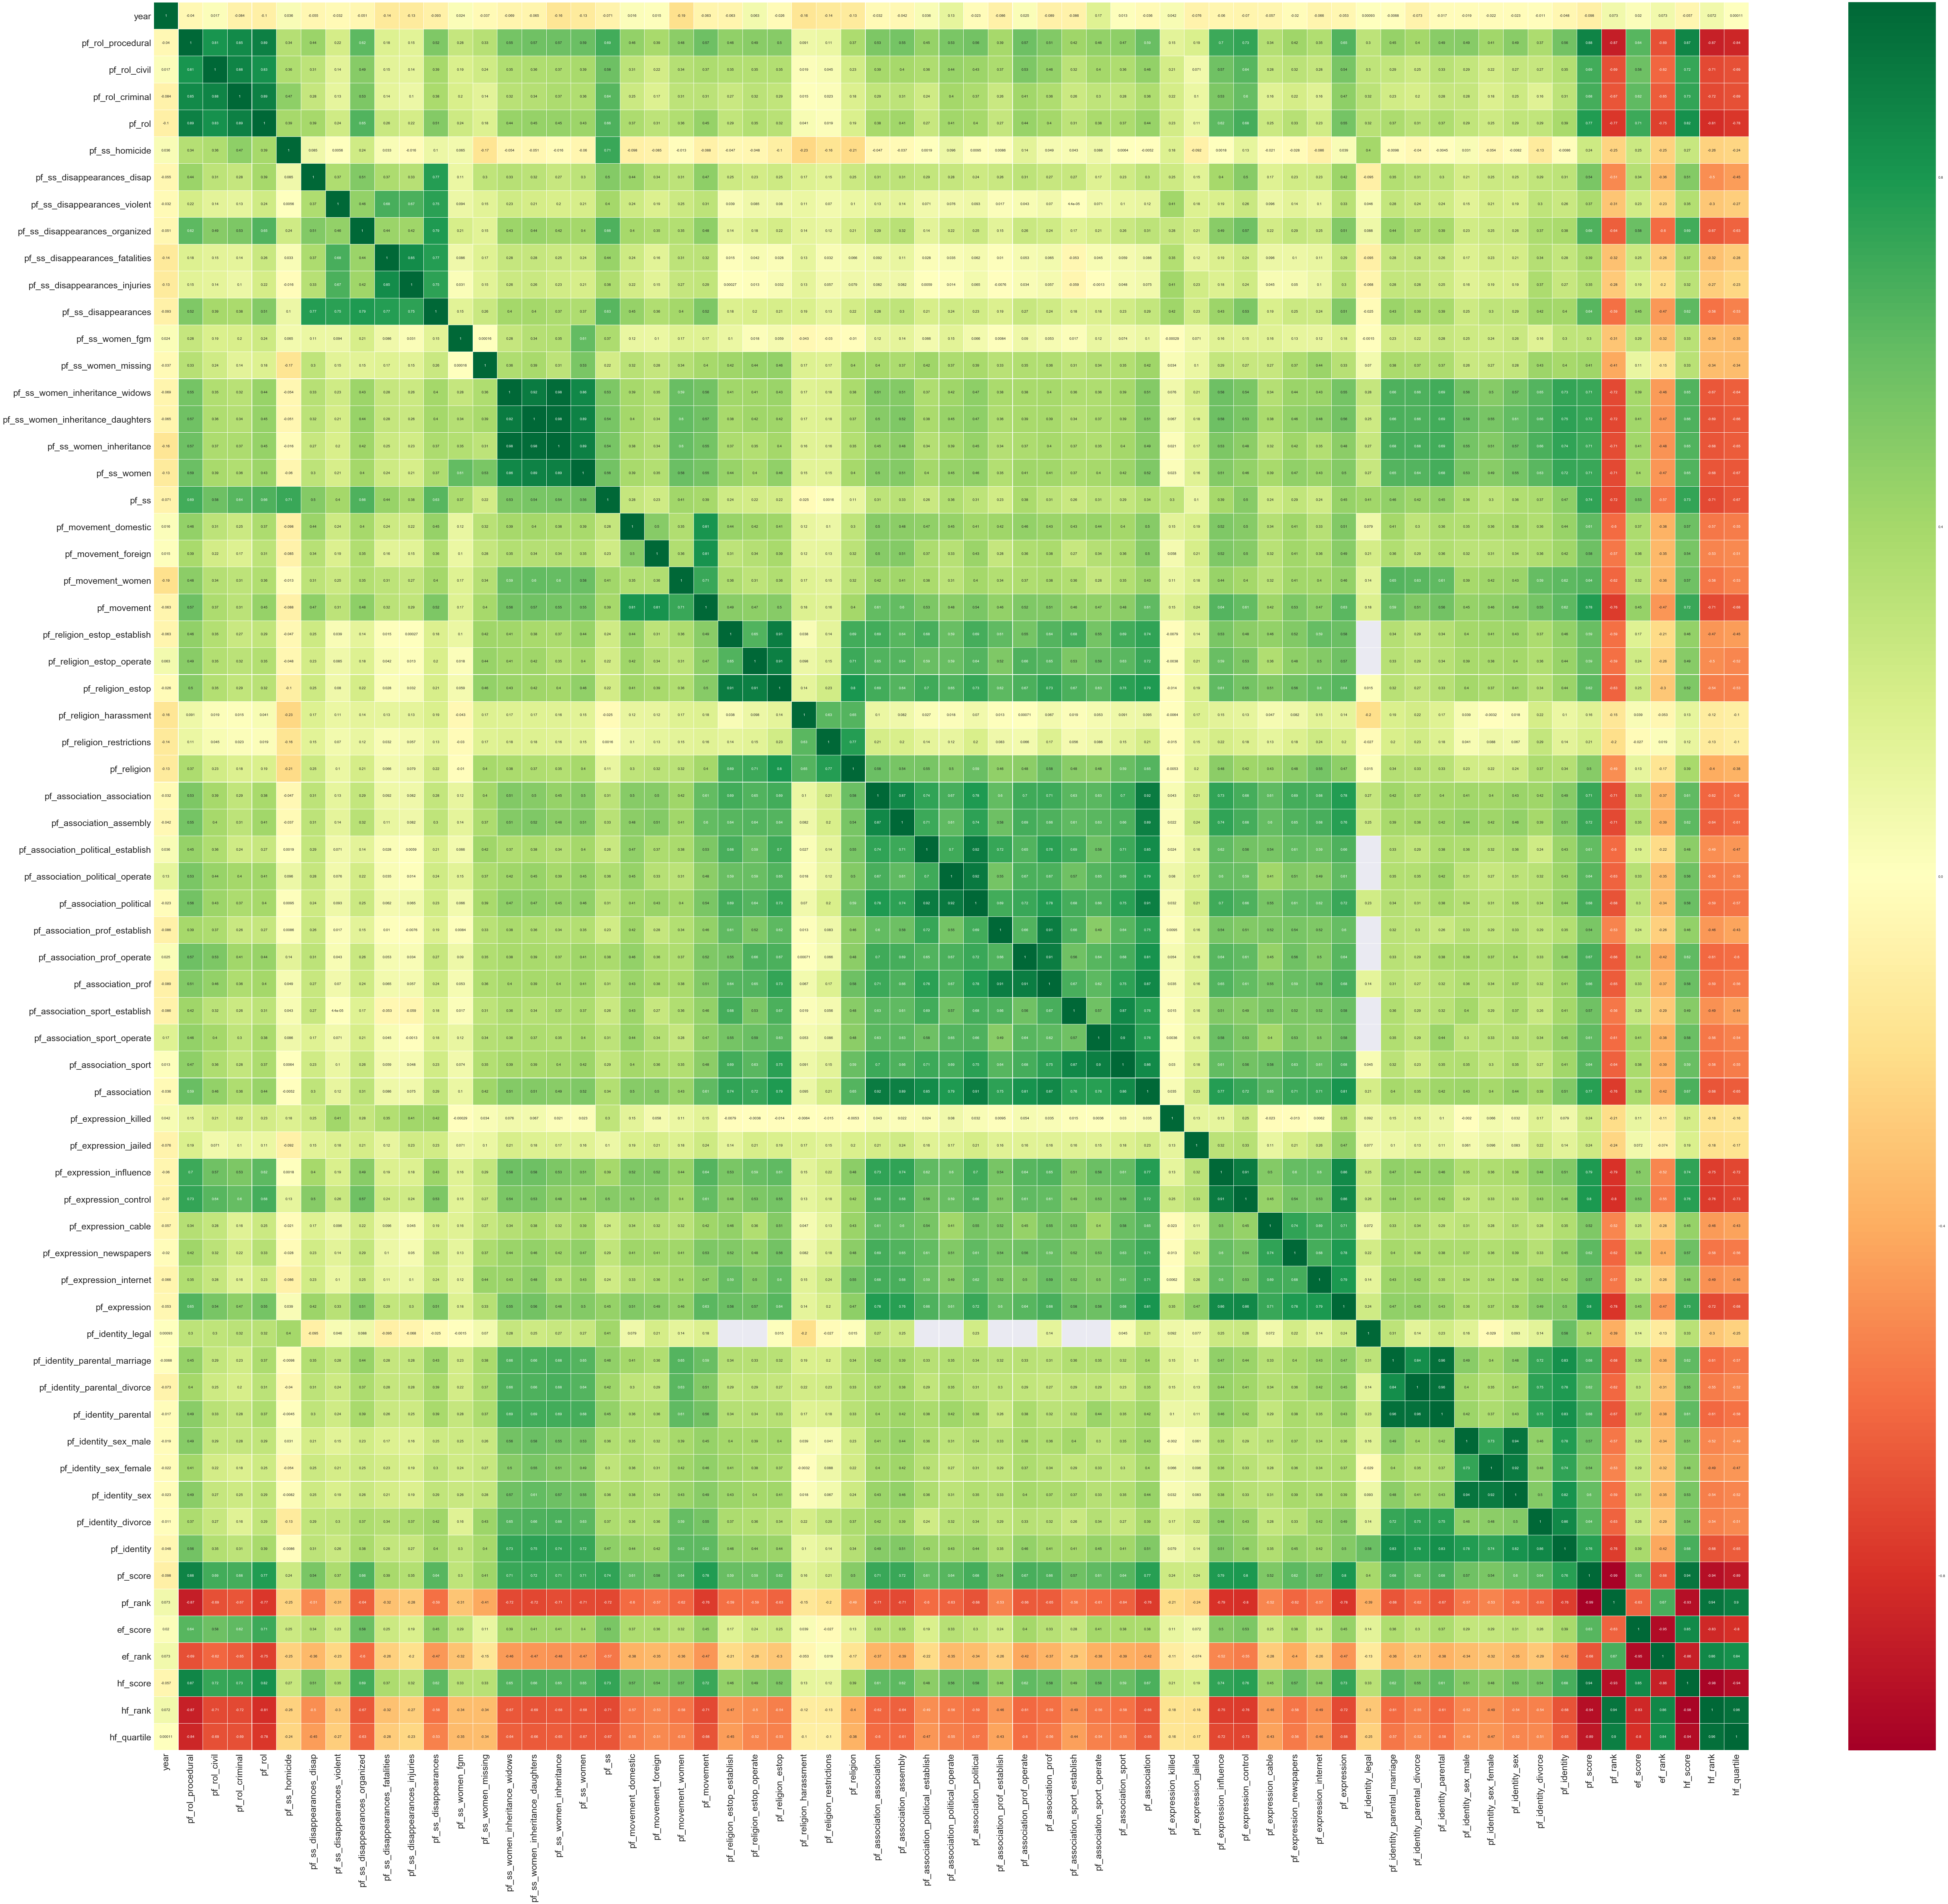

In [19]:
corr = data_pf.corr()

sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.1,)
fig=plt.gcf()
fig.set_size_inches(100,90)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [20]:
data_pf.corr().sort_values('hf_rank', ascending = False)[0:1]

year  pf_rol_procedural  pf_rol_civil  pf_rol_criminal    pf_rol  pf_ss_homicide  pf_ss_disappearances_disap  pf_ss_disappearances_violent  pf_ss_disappearances_organized  pf_ss_disappearances_fatalities  pf_ss_disappearances_injuries  pf_ss_disappearances  pf_ss_women_fgm  pf_ss_women_missing  pf_ss_women_inheritance_widows  pf_ss_women_inheritance_daughters  pf_ss_women_inheritance  pf_ss_women     pf_ss  pf_movement_domestic  pf_movement_foreign  pf_movement_women  pf_movement  pf_religion_estop_establish  pf_religion_estop_operate  pf_religion_estop  pf_religion_harassment  pf_religion_restrictions  pf_religion  pf_association_association  pf_association_assembly  pf_association_political_establish  pf_association_political_operate  pf_association_political  pf_association_prof_establish  pf_association_prof_operate  pf_association_prof  pf_association_sport_establish  pf_association_sport_operate  pf_association_sport  pf_association  pf_expression_killed  \
hf_rank  0.072256          -0.866529     -0.711317        -0.716954 -0.812391       -0.255594                   -0.495112                     -0.297377                       -0.668865                        -0.322244                       -0.26748             -0.584311        -0.341388            -0.337139                       -0.669197                          -0.686559                -0.676513    -0.677904 -0.711671             -0.565612              -0.5304          -0.576051    -0.713524                    -0.472999                  -0.504873          -0.541725               -0.118086                 -0.125178     -0.39876                   -0.622448                -0.635141                           -0.494781                         -0.558073                 -0.590744                      -0.461383                    -0.614894            -0.586674                       -0.492172                      -0.56287             -0.584526       -0.677223             -0.178003   

         pf_expression_jailed  pf_expression_influence  pf_expression_control  pf_expression_cable  pf_expression_newspapers  pf_expression_internet  pf_expression  pf_identity_legal  pf_identity_parental_marriage  pf_identity_parental_divorce  pf_identity_parental  pf_identity_sex_male  pf_identity_sex_female  pf_identity_sex  pf_identity_divorce  pf_identity  pf_score   pf_rank  ef_score   ef_rank  hf_score  hf_rank  hf_quartile  
hf_rank             -0.184584                -0.751164              -0.761509            -0.456904                 -0.576605               -0.485748      -0.717417          -0.301376                      -0.609202                     -0.549287             -0.614668             -0.518209               -0.487835        -0.542077            -0.536811    -0.684501 -0.936185  0.943677 -0.828809  0.861901 -0.984363      1.0     0.964141

# Attributes to look into because of their high correlation values
# Personal freedom 
* pf_rol (Rule of Law)
* pf_movement(Movement)
* pf_religion (Religion)
* pf_association (Association, Assembly, and Civil Society)
* pf_identity (Identity and Relationships)
* pf_ss (Security and Safety)

# Economic attributes

* ef_legal (Legal System and Property Rights
* ef_money (Access to Sound Money)
* ef_trade (Freedom to Trade Internationally
* ef_regulation (Regulation of Credit, Labor, and Business)

In [21]:
simple = ['pf_rol', 'pf_movement', 'pf_religion', 'pf_association', 'pf_identity', 'pf_ss', 'ef_legal', 'ef_money', 'ef_trade', 'ef_regulation']
data_simple = pd.DataFrame()
for column in data.columns:
    if column in simple:
        data_simple[column] = data[column]
    if column in info:
        data_simple[column] = data[column]

In [22]:
data_simple.head()

year ISO_code  countries                         region    pf_rol     pf_ss  pf_movement  pf_religion  pf_association  pf_identity  ef_legal  ef_money  ef_trade  ef_regulation  ef_score  ef_rank  hf_score  hf_rank  hf_quartile
0  2016      ALB    Albania                 Eastern Europe  5.291752  8.806810     6.666667     9.192593            10.0     6.250000  5.071814  9.553657  8.214900       6.906901      7.54     34.0  7.568140     48.0          2.0
1  2016      DZA    Algeria     Middle East & North Africa  3.819566  8.043882     5.000000     4.944815             5.0     0.833333  4.690743  7.253894  4.127025       5.268992      4.99    159.0  5.135886    155.0          4.0
2  2016      AGO     Angola             Sub-Saharan Africa  3.451814  8.297865     5.000000     8.786667             4.0     7.500000  2.963635  5.606605  5.264754       5.518500      5.17    155.0  5.640662    142.0          4.0
3  2016      ARG  Argentina  Latin America & the Caribbean  5.744791  9.040383    10.000000     7.795926             7.5    10.000000  3.904030  5.614336  3.982547       5.369019      4.84    160.0  6.469848    107.0          3.0
4  2016      ARM    Armenia        Caucasus & Central Asia  5.003205  8.830549     6.666667     6.222222             6.5     8.000000  5.809215  9.521940  8.143241       7.378069      7.57     29.0  7.241402     57.0          2.0

In [23]:
data_simple.describe()

year       pf_rol        pf_ss  pf_movement  pf_religion  pf_association  pf_identity     ef_legal     ef_money     ef_trade  ef_regulation     ef_score      ef_rank     hf_score      hf_rank  hf_quartile
count  1458.000000  1378.000000  1378.000000  1378.000000  1368.000000     1129.000000  1378.000000  1378.000000  1376.000000  1377.000000    1378.000000  1378.000000  1378.000000  1378.000000  1378.000000  1378.000000
mean   2012.000000     5.309641     8.181087     7.823537     7.875138        7.424343     7.334180     5.279768     8.123959     7.053594       7.019782     6.785610    76.973149     6.993444    77.007983     2.490566
std       2.582875     1.529310     1.368622     2.637650     1.348622        2.486858     3.159473     1.586692     1.375528     1.121063       1.027625     0.883601    44.540142     1.025811    44.506549     1.119698
min    2008.000000     0.000000     3.963850     0.000000     0.000000        0.250000     0.000000     1.429655     0.947500     1.781689       2.483540     2.880000     1.000000     3.765827     1.000000     1.000000
25%    2010.000000     4.131746     7.312488     6.666667     7.175417        6.000000     5.000000     4.122337     7.026636     6.404599       6.429498     6.250000    38.000000     6.336685    39.000000     1.000000
50%    2012.000000     4.910797     8.340442     8.333333     8.145370        8.000000     9.166667     5.228951     8.329583     7.148786       7.082075     6.900000    77.000000     6.923840    76.000000     2.000000
75%    2014.000000     6.513178     9.452965    10.000000     8.857778        9.500000    10.000000     6.210224     9.365663     7.882490       7.720955     7.410000   115.000000     7.894660   115.000000     3.000000
max    2016.000000     8.723094     9.975523    10.000000    10.000000       10.000000    10.000000     8.907112     9.922187     9.561530       9.439828     9.190000   162.000000     9.126313   162.000000     4.000000

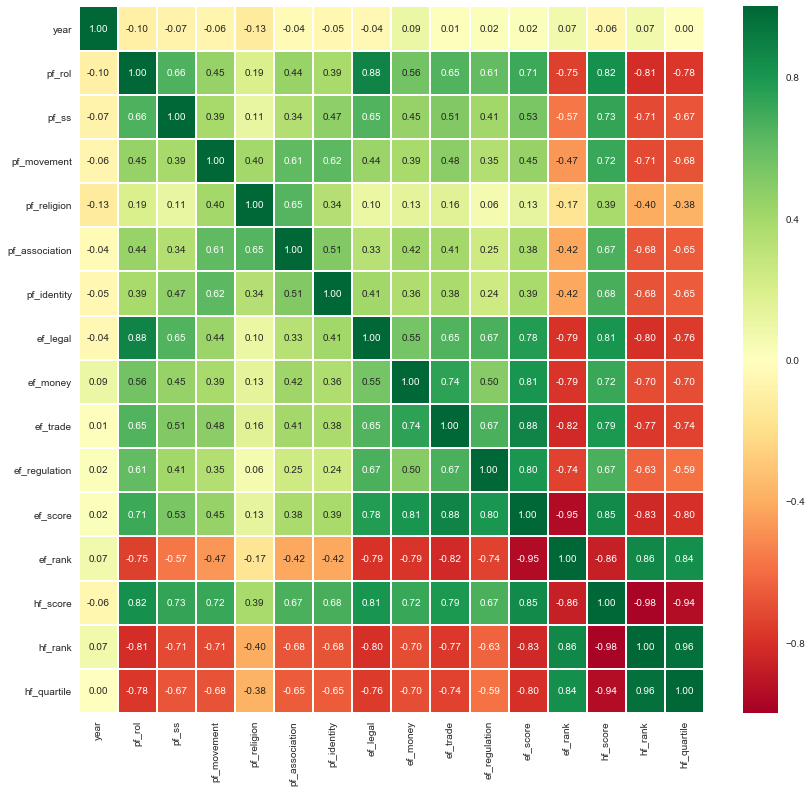

In [24]:
plt.figure(figsize=(14,13))
sns.heatmap(data=data_simple.corr(), cmap ='RdYlGn', annot = True, fmt='.2f', linewidths =1)
plt.show()

# Need to deal with duplicate or missing values, as well as finding outliers.

In [25]:
data_simple.head()

year ISO_code  countries                         region    pf_rol     pf_ss  pf_movement  pf_religion  pf_association  pf_identity  ef_legal  ef_money  ef_trade  ef_regulation  ef_score  ef_rank  hf_score  hf_rank  hf_quartile
0  2016      ALB    Albania                 Eastern Europe  5.291752  8.806810     6.666667     9.192593            10.0     6.250000  5.071814  9.553657  8.214900       6.906901      7.54     34.0  7.568140     48.0          2.0
1  2016      DZA    Algeria     Middle East & North Africa  3.819566  8.043882     5.000000     4.944815             5.0     0.833333  4.690743  7.253894  4.127025       5.268992      4.99    159.0  5.135886    155.0          4.0
2  2016      AGO     Angola             Sub-Saharan Africa  3.451814  8.297865     5.000000     8.786667             4.0     7.500000  2.963635  5.606605  5.264754       5.518500      5.17    155.0  5.640662    142.0          4.0
3  2016      ARG  Argentina  Latin America & the Caribbean  5.744791  9.040383    10.000000     7.795926             7.5    10.000000  3.904030  5.614336  3.982547       5.369019      4.84    160.0  6.469848    107.0          3.0
4  2016      ARM    Armenia        Caucasus & Central Asia  5.003205  8.830549     6.666667     6.222222             6.5     8.000000  5.809215  9.521940  8.143241       7.378069      7.57     29.0  7.241402     57.0          2.0

In [26]:
data_simple.isnull().sum()

year                0
ISO_code            0
countries           0
region              0
pf_rol             80
pf_ss              80
pf_movement        80
pf_religion        90
pf_association    329
pf_identity        80
ef_legal           80
ef_money           82
ef_trade           81
ef_regulation      80
ef_score           80
ef_rank            80
hf_score           80
hf_rank            80
hf_quartile        80
dtype: int64

In [27]:
data_simple.fillna('0').head()

year ISO_code  countries                         region   pf_rol    pf_ss pf_movement pf_religion pf_association pf_identity ef_legal ef_money ef_trade ef_regulation ef_score ef_rank hf_score hf_rank hf_quartile
0  2016      ALB    Albania                 Eastern Europe  5.29175  8.80681     6.66667     9.19259             10        6.25  5.07181  9.55366   8.2149        6.9069     7.54      34  7.56814      48           2
1  2016      DZA    Algeria     Middle East & North Africa  3.81957  8.04388           5     4.94481              5    0.833333  4.69074  7.25389  4.12702       5.26899     4.99     159  5.13589     155           4
2  2016      AGO     Angola             Sub-Saharan Africa  3.45181  8.29786           5     8.78667              4         7.5  2.96364  5.60661  5.26475        5.5185     5.17     155  5.64066     142           4
3  2016      ARG  Argentina  Latin America & the Caribbean  5.74479  9.04038          10     7.79593            7.5          10  3.90403  5.61434  3.98255       5.36902     4.84     160  6.46985     107           3
4  2016      ARM    Armenia        Caucasus & Central Asia  5.00321  8.83055     6.66667     6.22222            6.5           8  5.80921  9.52194  8.14324       7.37807     7.57      29   7.2414      57           2

In [28]:
data_simple.isnull().sum()

year                0
ISO_code            0
countries           0
region              0
pf_rol             80
pf_ss              80
pf_movement        80
pf_religion        90
pf_association    329
pf_identity        80
ef_legal           80
ef_money           82
ef_trade           81
ef_regulation      80
ef_score           80
ef_rank            80
hf_score           80
hf_rank            80
hf_quartile        80
dtype: int64

In [29]:
data_simple = data_simple.replace(np.nan, 0)

In [30]:
def round_(a, decimals=0, out=None):
    try:
        if a.dtype == np.object:
            a = np.array(a, dtype=np.float)
    except AttributeError:
        pass
    try:
        round = a.round
    except AttributeError:
        return _wrapit(a, 'round', decimals, out)
    return round(decimals, out)
round_(data_simple).head()


year ISO_code  countries                         region  pf_rol  pf_ss  pf_movement  pf_religion  pf_association  pf_identity  ef_legal  ef_money  ef_trade  ef_regulation  ef_score  ef_rank  hf_score  hf_rank  hf_quartile
0  2016      ALB    Albania                 Eastern Europe     5.0    9.0          7.0          9.0            10.0          6.0       5.0      10.0       8.0            7.0       8.0     34.0       8.0     48.0          2.0
1  2016      DZA    Algeria     Middle East & North Africa     4.0    8.0          5.0          5.0             5.0          1.0       5.0       7.0       4.0            5.0       5.0    159.0       5.0    155.0          4.0
2  2016      AGO     Angola             Sub-Saharan Africa     3.0    8.0          5.0          9.0             4.0          8.0       3.0       6.0       5.0            6.0       5.0    155.0       6.0    142.0          4.0
3  2016      ARG  Argentina  Latin America & the Caribbean     6.0    9.0         10.0          8.0             8.0         10.0       4.0       6.0       4.0            5.0       5.0    160.0       6.0    107.0          3.0
4  2016      ARM    Armenia        Caucasus & Central Asia     5.0    9.0          7.0          6.0             6.0          8.0       6.0      10.0       8.0            7.0       8.0     29.0       7.0     57.0          2.0

In [31]:
# freedom_class = round_(data_simple)
# economy_class = round_(data_simple)

# plt.figure(figsize=(28,28))

# plt.suptitle("Interesting Scatter Plots",fontsize=20)

# plt.subplot(2,2,1)
# sns.scatterplot(data=data_simple,x="pf_rule_of_law",y="ef_legal",hue=freedom_class, palette="RdYlGn",alpha=0.7,size=economy_class, sizes=(10,200))
# plt.xlabel("Rule Of Law")
# plt.ylabel("Legal System and Property Rights")
# plt.grid()

# plt.subplot(2,2,2)
# sns.scatterplot(data=data_simple,x="ef_trade",y="ef_money_access",hue=freedom_class, palette="RdYlGn",alpha=0.7,size=economy_class, sizes=(10,200))
# plt.xlabel("Freedom to Trade Internationally")
# plt.ylabel("Access to Sound Money")
# plt.grid()

# plt.subplot(2,2,3)
# sns.scatterplot(data=data_simple,x="pf_security_safety",y="pf_expression",hue=freedom_class, palette="RdYlGn",alpha=0.7,size=economy_class, sizes=(10,200))
# plt.xlabel("Security and Safety")
# plt.ylabel("Expression and Information")
# plt.grid()

# plt.subplot(2,2,4)
# sns.scatterplot(data=data_simple,x="pf_association",y="ef_regulation",hue=freedom_class, palette="RdYlGn",alpha=0.7,size=economy_class, sizes=(10,200))
# plt.xlabel("Association, Assembly, and Civil Society")
# plt.ylabel("Regulation of Credit, Labor, and Business")
# plt.grid()

# plt.show()

# Now let's do some more visualizations. First let's start with a simple scatterplot comparing economic freedom and human freedom ranks, with the color representing the quartile.

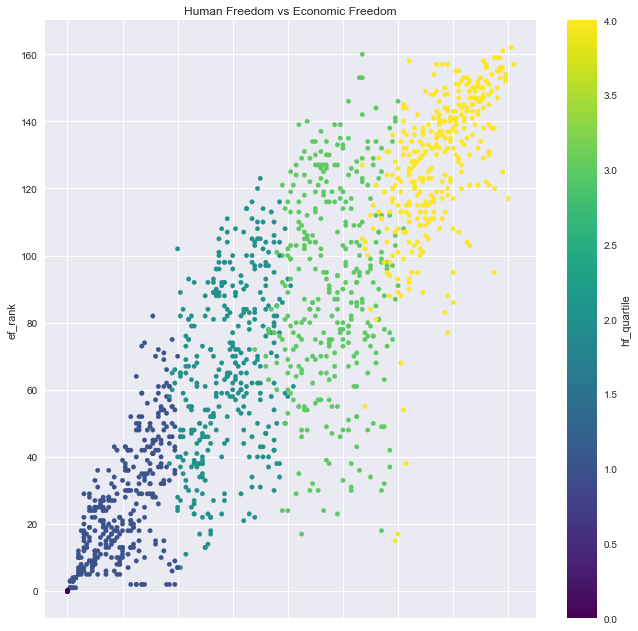

In [32]:
data_simple.plot.scatter('hf_rank','ef_rank', c = 'hf_quartile', colormap = 'viridis', figsize=(11,11), title = 'Human Freedom vs Economic Freedom')

In [33]:
data_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 19 columns):
year              1458 non-null int64
ISO_code          1458 non-null object
countries         1458 non-null object
region            1458 non-null object
pf_rol            1458 non-null float64
pf_ss             1458 non-null float64
pf_movement       1458 non-null float64
pf_religion       1458 non-null float64
pf_association    1458 non-null float64
pf_identity       1458 non-null float64
ef_legal          1458 non-null float64
ef_money          1458 non-null float64
ef_trade          1458 non-null float64
ef_regulation     1458 non-null float64
ef_score          1458 non-null float64
ef_rank           1458 non-null float64
hf_score          1458 non-null float64
hf_rank           1458 non-null float64
hf_quartile       1458 non-null float64
dtypes: float64(15), int64(1), object(3)
memory usage: 216.5+ KB


# Now lets do another scatter plot, but this time let's use the score instead of the rank to see how different the distribution will be.

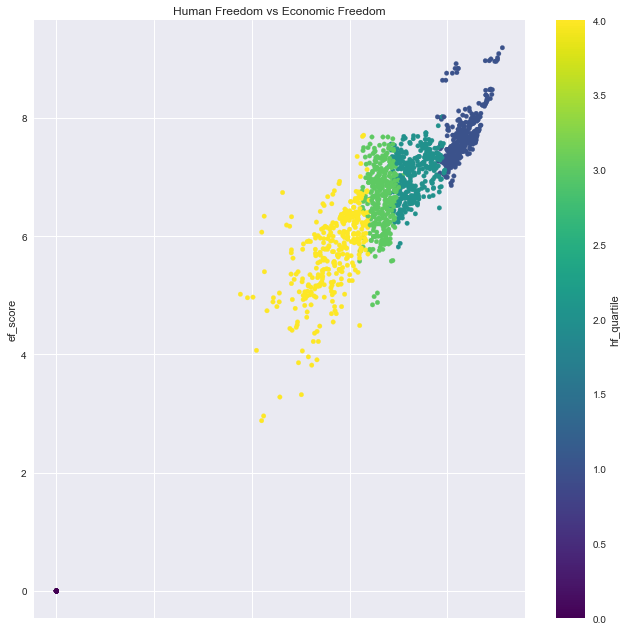

In [34]:
data_simple.plot.scatter('hf_score','ef_score', c = 'hf_quartile', colormap='viridis', figsize = (11,11),
                         title = 'Human Freedom vs Economic Freedom')

# Looks like we have some rows with zeroes for their most important attributes. These data points are scewing the shape of the plot, so let's drop them from the data set.

In [35]:
data_simple.sort_values('hf_score', ascending = True).head()

year ISO_code   countries                      region  pf_rol  pf_ss  pf_movement  pf_religion  pf_association  pf_identity  ef_legal  ef_money  ef_trade  ef_regulation  ef_score  ef_rank  hf_score  hf_rank  hf_quartile
1220  2009      LBY       Libya  Middle East & North Africa     0.0    0.0          0.0          0.0             0.0          0.0       0.0       0.0       0.0            0.0       0.0      0.0       0.0      0.0          0.0
776   2012      SYC  Seychelles          Sub-Saharan Africa     0.0    0.0          0.0          0.0             0.0          0.0       0.0       0.0       0.0            0.0       0.0      0.0       0.0      0.0          0.0
1321  2008      KHM    Cambodia                  South Asia     0.0    0.0          0.0          0.0             0.0          0.0       0.0       0.0       0.0            0.0       0.0      0.0       0.0      0.0          0.0
784   2012      SDN       Sudan          Sub-Saharan Africa     0.0    0.0          0.0          0.0             0.0          0.0       0.0       0.0       0.0            0.0       0.0      0.0       0.0      0.0          0.0
1324  2008      CPV  Cape Verde          Sub-Saharan Africa     0.0    0.0          0.0          0.0             0.0          0.0       0.0       0.0       0.0            0.0       0.0      0.0       0.0      0.0          0.0

In [36]:
data_simple.sort_values('hf_score', ascending = False).head()

year ISO_code  countries     region    pf_rol     pf_ss  pf_movement  pf_religion  pf_association  pf_identity  ef_legal  ef_money  ef_trade  ef_regulation  ef_score  ef_rank  hf_score  hf_rank  hf_quartile
1359  2008      HKG  Hong Kong  East Asia  7.500000  9.506144         10.0     9.658519        9.416667         10.0  8.275295  9.536101  9.561530       9.175875      9.19      1.0  9.126313      1.0          1.0
1197  2009      HKG  Hong Kong  East Asia  7.500000  9.632484         10.0     8.905185        9.416667         10.0  8.357444  9.278175  9.371584       9.108180      9.09      1.0  9.052653      1.0          1.0
1035  2010      HKG  Hong Kong  East Asia  7.500000  9.655795         10.0     9.015185        9.416667         10.0  8.181453  9.310312  9.366211       9.381370      9.02      1.0  9.028448      1.0          1.0
873   2011      HKG  Hong Kong  East Asia  7.500000  9.690143         10.0     8.920556        9.750000         10.0  8.054720  9.214337  9.355861       9.372707      8.99      1.0  9.027891      1.0          1.0
711   2012      HKG  Hong Kong  East Asia  7.387302  9.671564         10.0     9.044074        9.750000         10.0  7.963019  9.187756  9.362417       9.404905      8.96      1.0  8.999086      1.0          1.0

In [37]:
data_simple.drop(data_simple[data_simple.hf_score == 0].index, inplace=True)

In [38]:
data_simple.sort_values('hf_score', ascending = True).head()

year ISO_code  countries                         region    pf_rol     pf_ss  pf_movement  pf_religion  pf_association  pf_identity  ef_legal  ef_money  ef_trade  ef_regulation  ef_score  ef_rank  hf_score  hf_rank  hf_quartile
141  2016      SYR      Syria     Middle East & North Africa  1.980355  4.984073     0.000000     4.405556            0.00          0.0  3.444509  5.119577  4.912574       5.444445      5.02    157.0  3.765827    162.0          4.0
303  2015      SYR      Syria     Middle East & North Africa  2.930968  4.984073     0.000000     5.288889            0.00          0.0  3.428249  4.869577  4.912574       5.392640      4.96    154.0  3.910826    159.0          4.0
465  2014      SYR      Syria     Middle East & North Africa  3.075800  4.984073     0.000000     8.289444            0.00          0.0  3.574842  5.119577  4.507844       5.437804      4.97    153.0  4.023595    159.0          4.0
627  2013      SYR      Syria     Middle East & North Africa  3.584558  4.984073     1.666667     8.322963            6.25          0.0  1.544514  4.869577  3.571752       4.148599      4.07    156.0  4.095028    157.0          4.0
157  2016      VEN  Venezuela  Latin America & the Caribbean  2.060257  6.294476     8.333333     6.884815            6.50          7.5  2.002915  1.942101  3.281311       2.483540      2.88    162.0  4.200724    161.0          4.0

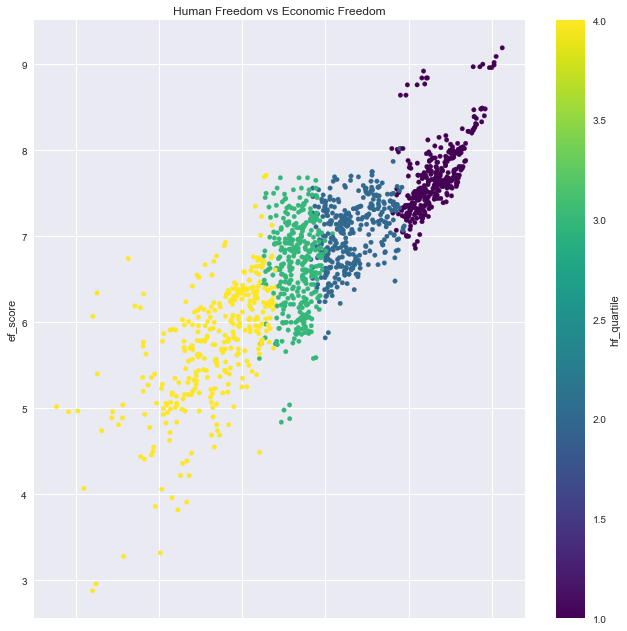

In [39]:
data_simple.plot.scatter('hf_score','ef_score', c = 'hf_quartile', title = 'Human Freedom vs Economic Freedom',
                         colormap='viridis', figsize = (11,11))

# Much better! Now we can get a clearer picture of the spread of the data.

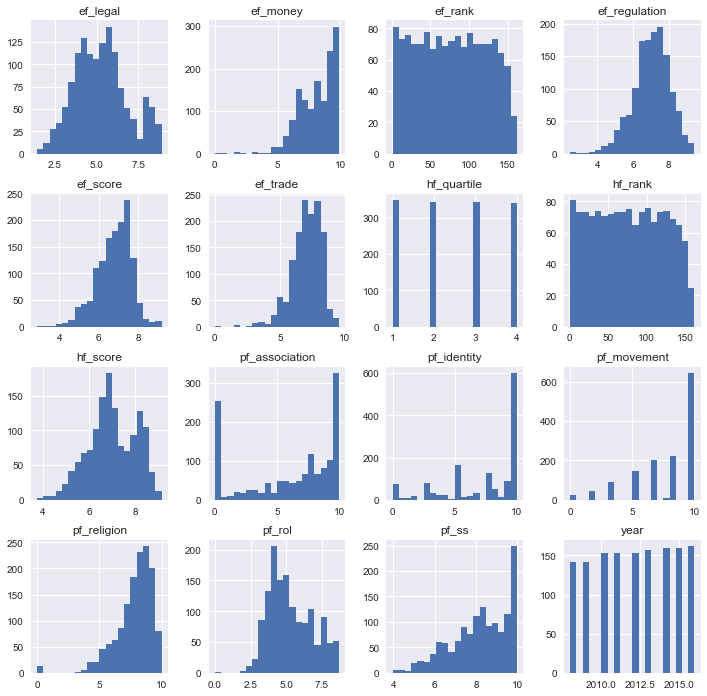

In [40]:
data_simple.hist(bins=20,figsize=(12,12))
plt.show()

In [41]:
data_simple.head()

year ISO_code  countries                         region    pf_rol     pf_ss  pf_movement  pf_religion  pf_association  pf_identity  ef_legal  ef_money  ef_trade  ef_regulation  ef_score  ef_rank  hf_score  hf_rank  hf_quartile
0  2016      ALB    Albania                 Eastern Europe  5.291752  8.806810     6.666667     9.192593            10.0     6.250000  5.071814  9.553657  8.214900       6.906901      7.54     34.0  7.568140     48.0          2.0
1  2016      DZA    Algeria     Middle East & North Africa  3.819566  8.043882     5.000000     4.944815             5.0     0.833333  4.690743  7.253894  4.127025       5.268992      4.99    159.0  5.135886    155.0          4.0
2  2016      AGO     Angola             Sub-Saharan Africa  3.451814  8.297865     5.000000     8.786667             4.0     7.500000  2.963635  5.606605  5.264754       5.518500      5.17    155.0  5.640662    142.0          4.0
3  2016      ARG  Argentina  Latin America & the Caribbean  5.744791  9.040383    10.000000     7.795926             7.5    10.000000  3.904030  5.614336  3.982547       5.369019      4.84    160.0  6.469848    107.0          3.0
4  2016      ARM    Armenia        Caucasus & Central Asia  5.003205  8.830549     6.666667     6.222222             6.5     8.000000  5.809215  9.521940  8.143241       7.378069      7.57     29.0  7.241402     57.0          2.0

In [53]:
national_2008.info()
national_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1296 to 1457
Data columns (total 19 columns):
year              141 non-null int64
ISO_code          141 non-null object
countries         141 non-null object
region            141 non-null object
pf_rol            141 non-null float64
pf_ss             141 non-null float64
pf_movement       141 non-null float64
pf_religion       141 non-null float64
pf_association    141 non-null float64
pf_identity       141 non-null float64
ef_legal          141 non-null float64
ef_money          141 non-null float64
ef_trade          141 non-null float64
ef_regulation     141 non-null float64
ef_score          141 non-null float64
ef_rank           141 non-null float64
hf_score          141 non-null float64
hf_rank           141 non-null float64
hf_quartile       141 non-null float64
dtypes: float64(15), int64(1), object(3)
memory usage: 22.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total

# Time for some hot visualizations!

In [45]:
national_2008 = data_simple[data_simple['year'] == 2008]

        
national_2016 = data_simple[data_simple['year'] == 2016]

        
metricscale1=[[0.0,"rgb(20, 40, 190)"],[0.05,"rgb(40, 60, 190)"],[0.25,"rgb(70, 100, 245)"],[0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]]
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = 'nipy_spectral_r',
        reversescale = True,
        showscale = True,
        locations = national_2008['countries'].values,
        z = national_2008['ef_score'].values,
        locationmode = 'country names',
        text = national_2008['ef_score'].values,
        marker = dict(
            line = dict(color = 'rgb(200,200,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Economic Freedom Score'))]

layout = dict(
    title = 'Economic Freedom in 2008',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(222,243,246)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(lon = 60,lat = 10),),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)')),)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2008')

data2 = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = 'nipy_spectral_r',
        reversescale = True,
        showscale = True,
        locations = national_2016['countries'].values,
        z = national_2016['ef_score'].values,
        locationmode = 'country names',
        text = national_2016['countries'].values,
        marker = dict(
            line = dict(color = 'rgb(200,200,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Economic Freedom Score'))]

layout2 = dict(
    title = 'Economic Freedom in 2016',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(222,243,246)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(lon = 60,lat = 10),),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)')),)
fig = dict(data=data2, layout=layout2)
py.iplot(fig, validate=False, filename='worldmap2016') 

AttributeError: 'str' object has no attribute 'keys'

In [ ]:
# national_2008 = data_simple[data_simple['year'] == 2008]

        
# national_2016 = data_simple[data_simple['year'] == 2016]

        
# metricscale1=[[0.0,"rgb(20, 40, 190)"],[0.05,"rgb(40, 60, 190)"],[0.25,"rgb(70, 100, 245)"],[0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]]
# data = [ dict(
#         type = 'choropleth',
#         autocolorscale = False,
#         colorscale = 'nipy_spectral_r',
#         reversescale = True,
#         showscale = True,
#         locations = national_2008['countries'].values,
#         z = national_2008['hf_score'].values,
#         locationmode = 'country names',
#         text = national_2008['hf_score'].values,
#         marker = dict(
#             line = dict(color = 'rgb(200,200,200)', width = 0.5)),
#             colorbar = dict(autotick = True, tickprefix = '', 
#             title = 'Human Freedom Score'))]

# layout = dict(
#     title = 'Human Freedom in 2008',
#     geo = dict(
#         showframe = True,
#         showocean = True,
#         oceancolor = 'rgb(222,243,246)',
#         projection = dict(
#         type = 'orthographic',
#             rotation = dict(lon = 60,lat = 10),),
#         lonaxis =  dict(
#                 showgrid = False,
#                 gridcolor = 'rgb(102, 102, 102)'),
#         lataxis = dict(
#                 showgrid = False,
#                 gridcolor = 'rgb(102, 102, 102)')),)
# fig = dict(data=data, layout=layout)
# py.iplot(fig, validate=False, filename='worldmap2008')

# data2 = [ dict(
#         type = 'choropleth',
#         autocolorscale = False,
#         colorscale = 'nipy_spectral_r',
#         reversescale = True,
#         showscale = True,
#         locations = national_2016['countries'].values,
#         z = national_2016['hf_score'].values,
#         locationmode = 'country names',
#         text = national_2016['countries'].values,
#         marker = dict(
#             line = dict(color = 'rgb(200,200,200)', width = 0.5)),
#             colorbar = dict(autotick = True, tickprefix = '', 
#             title = 'Human Freedom Score'))]

# layout2 = dict(
#     title = 'Human Freedom in 2016',
#     geo = dict(
#         showframe = True,
#         showocean = True,
#         oceancolor = 'rgb(222,243,246)',
#         projection = dict(
#         type = 'orthographic',
#             rotation = dict(lon = 60,lat = 10),),
#         lonaxis =  dict(
#                 showgrid = False,
#                 gridcolor = 'rgb(102, 102, 102)'),
#         lataxis = dict(
#                 showgrid = False,
#                 gridcolor = 'rgb(102, 102, 102)')),)
# fig = dict(data=data2, layout=layout2)
# py.iplot(fig, validate=False, filename='worldmap2016') 

# Let's make a new attribute that is the sum of economic and personal freedom so we can see the evolution of nations from 2008-2016

In [54]:
data_simple['tf_score'] = round(data_simple['ef_score'] + data_simple['hf_score'], 2)  
data_simple.head()

year ISO_code  countries                         region    pf_rol     pf_ss  pf_movement  pf_religion  pf_association  pf_identity  ef_legal  ef_money  ef_trade  ef_regulation  ef_score  ef_rank  hf_score  hf_rank  hf_quartile  tf_score
0  2016      ALB    Albania                 Eastern Europe  5.291752  8.806810     6.666667     9.192593            10.0     6.250000  5.071814  9.553657  8.214900       6.906901      7.54     34.0  7.568140     48.0          2.0     15.11
1  2016      DZA    Algeria     Middle East & North Africa  3.819566  8.043882     5.000000     4.944815             5.0     0.833333  4.690743  7.253894  4.127025       5.268992      4.99    159.0  5.135886    155.0          4.0     10.13
2  2016      AGO     Angola             Sub-Saharan Africa  3.451814  8.297865     5.000000     8.786667             4.0     7.500000  2.963635  5.606605  5.264754       5.518500      5.17    155.0  5.640662    142.0          4.0     10.81
3  2016      ARG  Argentina  Latin America & the Caribbean  5.744791  9.040383    10.000000     7.795926             7.5    10.000000  3.904030  5.614336  3.982547       5.369019      4.84    160.0  6.469848    107.0          3.0     11.31
4  2016      ARM    Armenia        Caucasus & Central Asia  5.003205  8.830549     6.666667     6.222222             6.5     8.000000  5.809215  9.521940  8.143241       7.378069      7.57     29.0  7.241402     57.0          2.0     14.81

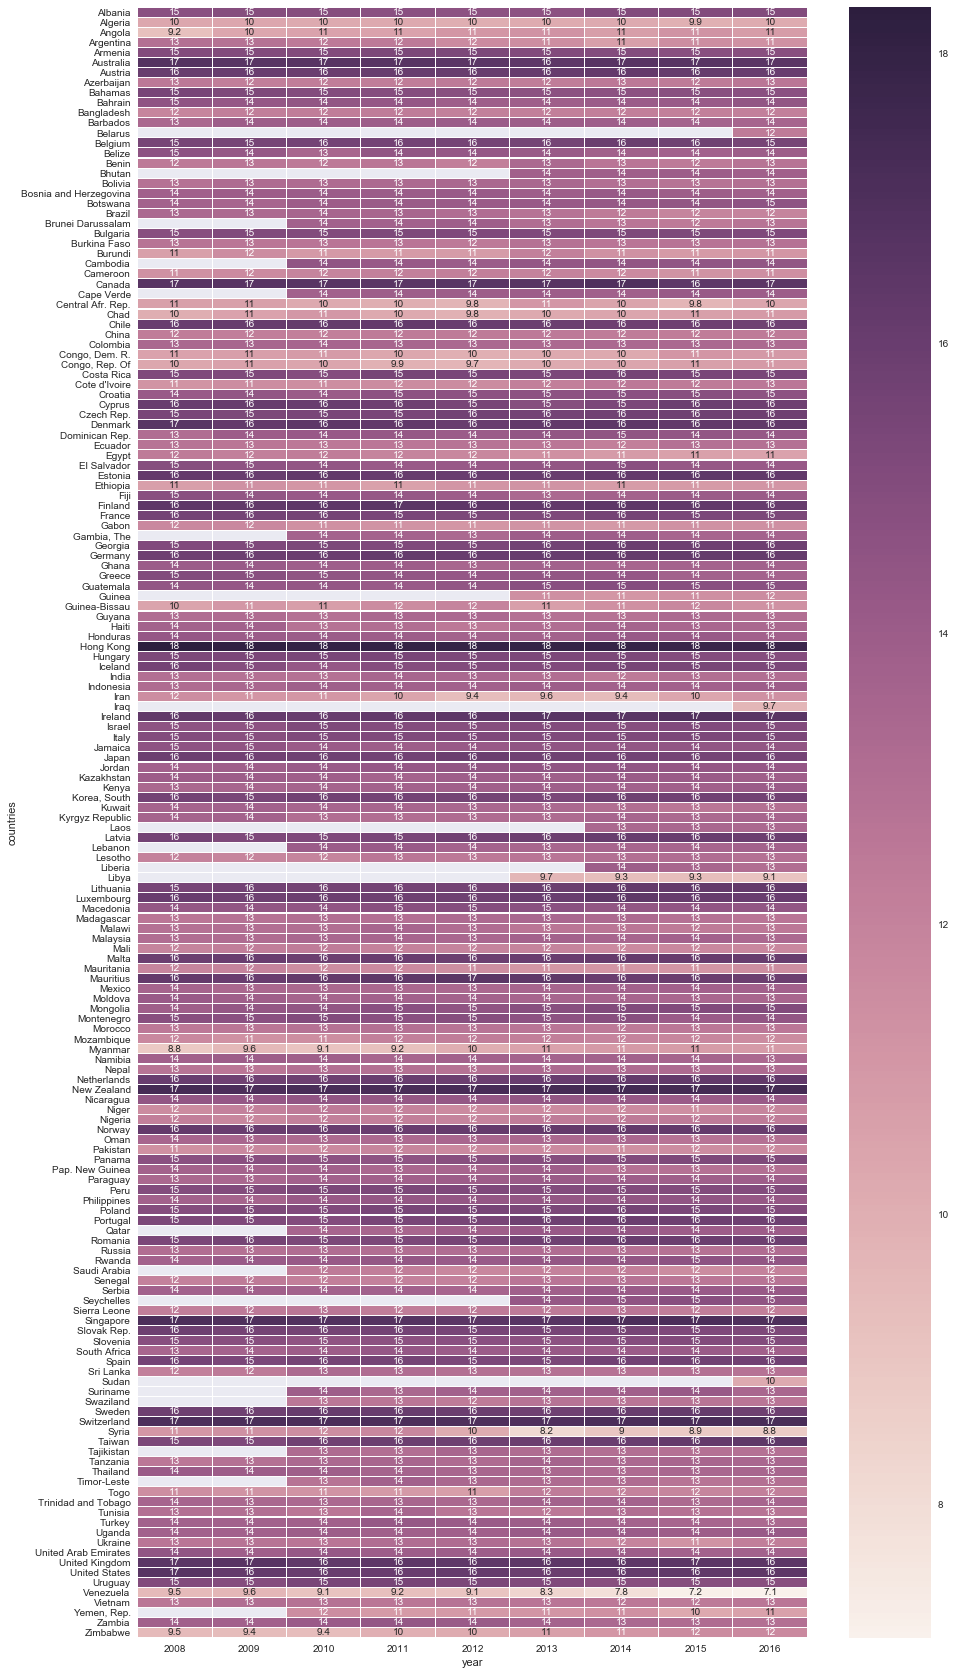

In [55]:
time = data_simple.pivot('countries', 'year','tf_score')

f, ax = plt.subplots(figsize=(15, 30))
sns.heatmap(time, annot=True,linewidths=.10, ax=ax)

# While we're at it, let's look at the evolution of economic and human freedom for this time period as well to see if there are any nations that underwent significant developments in either category

# Economic Freedom 

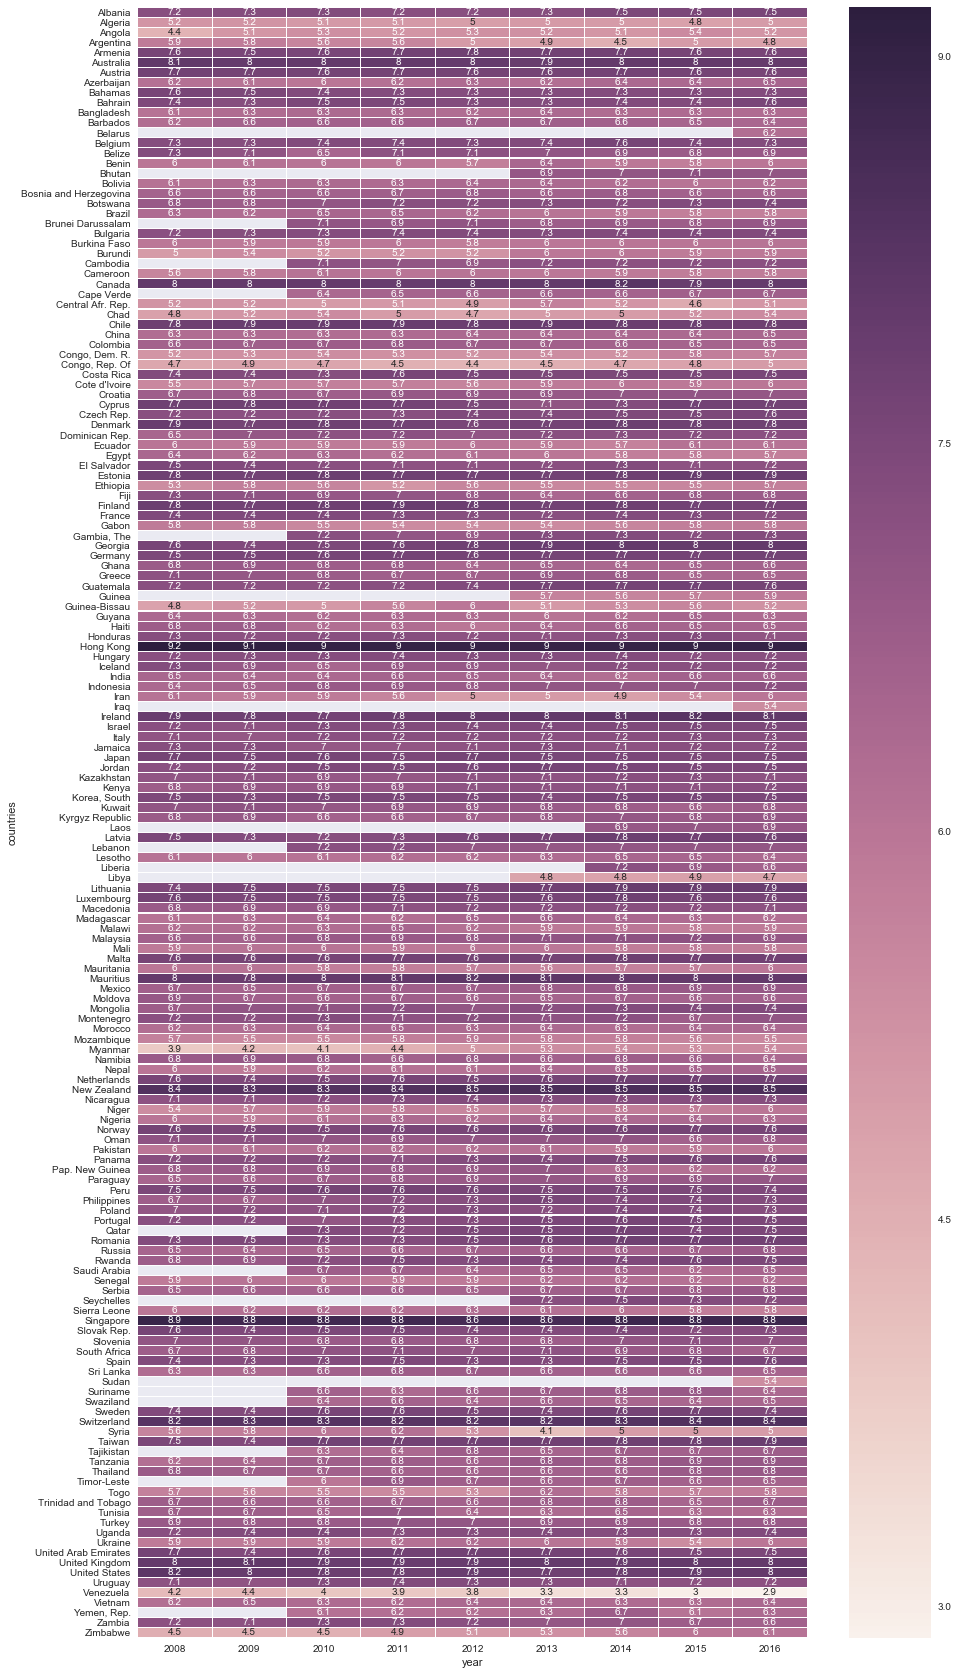

In [56]:
time = data_simple.pivot('countries', 'year','ef_score')

f, ax = plt.subplots(figsize=(15, 30))
sns.heatmap(time, annot=True,linewidths=.10, ax=ax)

# Human Freedom

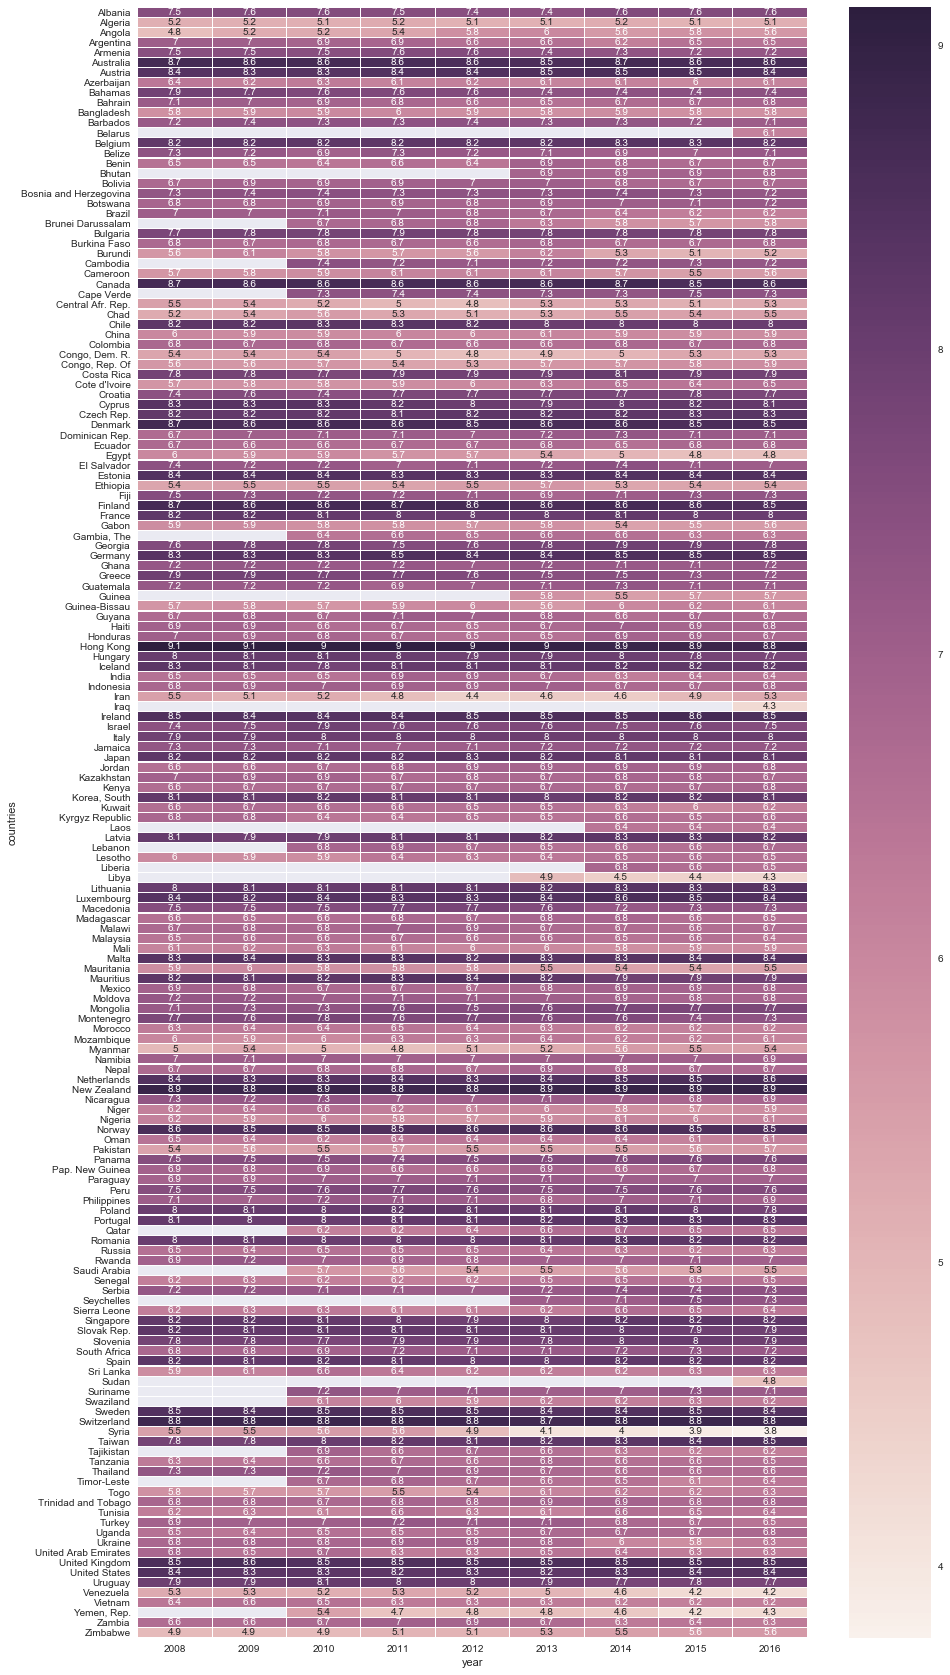

In [57]:
time = data_simple.pivot('countries', 'year','hf_score')

f, ax = plt.subplots(figsize=(15, 30))
sns.heatmap(time, annot=True,linewidths=.10, ax=ax)

# Let's check another scatterplot comparing economic freedom and human freedom, but this time let's use our total freedom attribute instead of the human freedom quartile. 

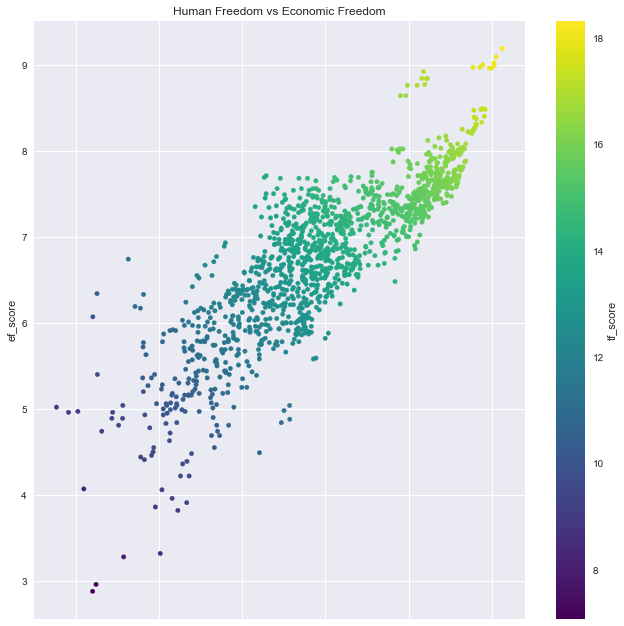

In [58]:
data_simple.plot.scatter('hf_score','ef_score', c = 'tf_score', title = 'Human Freedom vs Economic Freedom',
                         colormap='viridis', figsize = (11,11))

In [59]:
data_simple.groupby(['region'])["ef_score", "hf_score", 'tf_score',].describe()

ef_score                                                        hf_score                                                                       tf_score                                                             
                                 count      mean       std   min     25%    50%     75%   max    count      mean       std       min       25%       50%       75%       max    count       mean       std    min      25%     50%      75%    max
region                                                                                                                                                                                                                                            
Caucasus & Central Asia           52.0  7.030577  0.574215  5.97  6.6175  6.965  7.5700  8.02     52.0  6.879506  0.577477  5.966189  6.403687  6.766759  7.461251  7.895941     52.0  13.910769  1.127196  12.24  13.0075  13.770  15.0500  15.92
East Asia                         54.0  7.535000  0.809402  6.26  7.1700  7.500  7.7100  9.19     54.0  7.813020  0.947502  5.882350  7.591028  8.109151  8.230158  9.126313     54.0  15.348519  1.719573  12.17  14.7650  15.640  15.9125  18.32
Eastern Europe                   190.0  7.104474  0.467642  5.40  6.7525  7.200  7.4275  7.93    190.0  7.671637  0.554830  5.844352  7.363735  7.814029  8.093420  8.446540    190.0  14.776421  0.987881  11.24  14.1225  14.980  15.4500  16.38
Latin America & the Caribbean    232.0  6.734871  0.870565  2.88  6.4225  6.900  7.2850  7.91    232.0  7.047982  0.608904  4.200724  6.779311  7.028045  7.339903  8.290152    232.0  13.782974  1.433090   7.08  13.3175  13.950  14.6750  16.20
Middle East & North Africa       150.0  6.557000  0.851900  4.07  6.1475  6.755  7.2750  7.71    150.0  6.051464  0.906600  3.765827  5.365959  6.289613  6.665145  7.898469    150.0  12.608533  1.688092   8.17  11.3625  13.005  13.9350  15.22
North America                     18.0  7.956667  0.127741  7.74  7.8875  7.965  8.0250  8.22     18.0  8.461915  0.176386  8.187366  8.278206  8.484161  8.622812  8.719553     18.0  16.419444  0.283870  15.93  16.1575  16.490  16.6425  16.94
Oceania                           36.0  7.484722  0.779093  6.17  6.8300  7.590  8.1275  8.49     36.0  7.858762  0.915284  6.592903  6.941241  8.033486  8.710675  8.921386     36.0  15.343056  1.682815  12.85  13.7850  15.620  16.8450  17.40
South Asia                       136.0  6.655809  0.825430  3.86  6.3150  6.625  6.9725  8.92    136.0  6.533740  0.697855  4.779236  6.164774  6.585634  6.884113  8.226765    136.0  13.189412  1.466224   8.82  12.5700  13.210  13.8025  17.10
Sub-Saharan Africa               348.0  6.135259  0.783095  4.39  5.6275  6.010  6.7250  8.15    348.0  6.256850  0.694003  4.803024  5.723283  6.276072  6.740191  8.366166    348.0  12.391983  1.414440   9.23  11.2775  12.370  13.5875  16.52
Western Europe                   162.0  7.588086  0.309659  6.48  7.3900  7.600  7.7275  8.39    162.0  8.368293  0.219079  7.836820  8.207868  8.398904  8.518603  8.818141    162.0  15.956481  0.510790  14.32  15.6125  16.005  16.2775  17.18

# Now let's do some statistical analysis of freedom scores by region. Looking first at the mean value for each region.

In [60]:
data_simple_region_mean = data_simple.groupby(['region'])["ef_score", "hf_score", 'tf_score'].mean()
data_simple_region_mean = data_simple_region_mean.sort_values('tf_score', ascending = False)
data_simple_region_mean

ef_score  hf_score   tf_score
region                                                      
North America                  7.956667  8.461915  16.419444
Western Europe                 7.588086  8.368293  15.956481
East Asia                      7.535000  7.813020  15.348519
Oceania                        7.484722  7.858762  15.343056
Eastern Europe                 7.104474  7.671637  14.776421
Caucasus & Central Asia        7.030577  6.879506  13.910769
Latin America & the Caribbean  6.734871  7.047982  13.782974
South Asia                     6.655809  6.533740  13.189412
Middle East & North Africa     6.557000  6.051464  12.608533
Sub-Saharan Africa             6.135259  6.256850  12.391983

In [61]:
data_simple.head()

year ISO_code  countries                         region    pf_rol     pf_ss  pf_movement  pf_religion  pf_association  pf_identity  ef_legal  ef_money  ef_trade  ef_regulation  ef_score  ef_rank  hf_score  hf_rank  hf_quartile  tf_score
0  2016      ALB    Albania                 Eastern Europe  5.291752  8.806810     6.666667     9.192593            10.0     6.250000  5.071814  9.553657  8.214900       6.906901      7.54     34.0  7.568140     48.0          2.0     15.11
1  2016      DZA    Algeria     Middle East & North Africa  3.819566  8.043882     5.000000     4.944815             5.0     0.833333  4.690743  7.253894  4.127025       5.268992      4.99    159.0  5.135886    155.0          4.0     10.13
2  2016      AGO     Angola             Sub-Saharan Africa  3.451814  8.297865     5.000000     8.786667             4.0     7.500000  2.963635  5.606605  5.264754       5.518500      5.17    155.0  5.640662    142.0          4.0     10.81
3  2016      ARG  Argentina  Latin America & the Caribbean  5.744791  9.040383    10.000000     7.795926             7.5    10.000000  3.904030  5.614336  3.982547       5.369019      4.84    160.0  6.469848    107.0          3.0     11.31
4  2016      ARM    Armenia        Caucasus & Central Asia  5.003205  8.830549     6.666667     6.222222             6.5     8.000000  5.809215  9.521940  8.143241       7.378069      7.57     29.0  7.241402     57.0          2.0     14.81

In [62]:
df = data_simple[data_simple['region']=='North America'].groupby('countries').size()
df

countries
Canada           9
United States    9
dtype: int64

# Using the mean average for comparing regions has it's limitations and drawbacks however. The data set considers Mexico to be in Latin & Central America rather than being a part of North America, the average for North America is slightly skewed due to the United States and Canada having high ef and hf scores where as Mexico does not. The data is organized by region, rather strictly by continent, and most likely for good reason. Since the culture and politics of Mexico are more similar to its neighors to the south and east, than to the north.

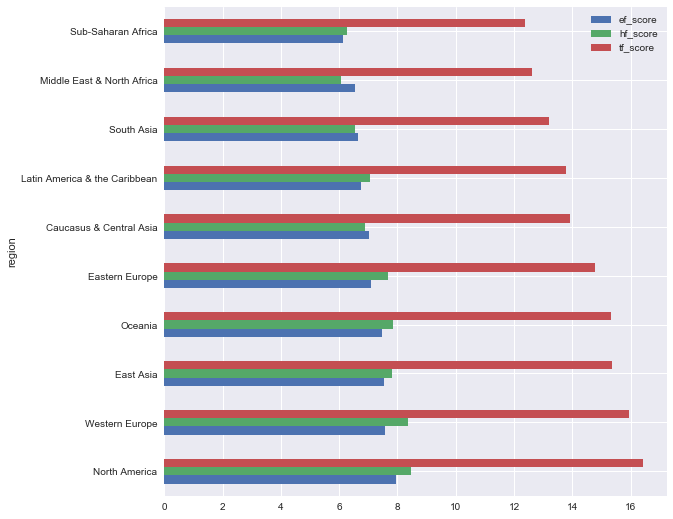

In [63]:
data_simple_region_mean.plot(kind='barh', figsize = (9,9))

In [64]:
best_3_free = data_simple[data_simple["hf_rank"] <= 5]
best_3_eco = data_simple[data_simple["ef_rank"] <= 5]

worst_3_free = data_simple[data_simple["hf_rank"] >= 158]
worst_3_eco = data_simple[data_simple["ef_rank"] >= 158]

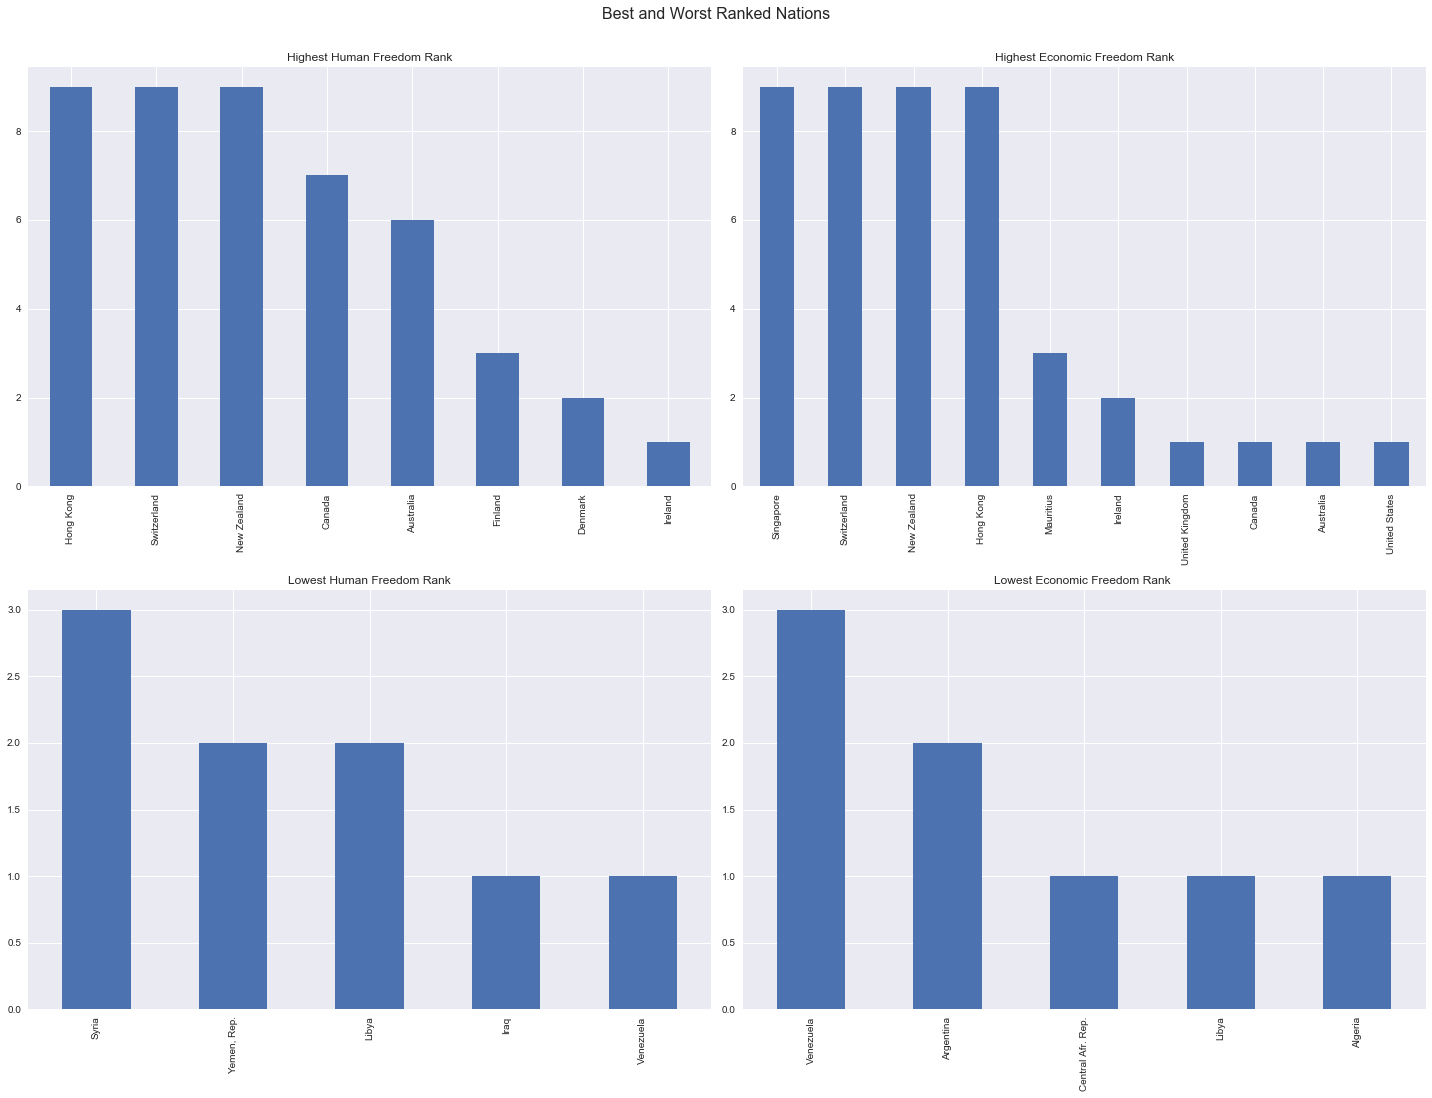

In [65]:
plt.figure(figsize=(20,16))

plt.suptitle("Best and Worst Ranked Nations",fontsize=16)

plt.subplot(2,2,1)
plt.title("Highest Human Freedom Rank")
best_3_free.countries.value_counts().plot.bar()


plt.subplot(2,2,2)
plt.title("Highest Economic Freedom Rank")
best_3_eco.countries.value_counts().plot.bar()


plt.subplot(2,2,3)
plt.title("Lowest Human Freedom Rank")
worst_3_free.countries.value_counts().plot.bar()


plt.subplot(2,2,4)
plt.title("Lowest Economic Freedom Rank ")
worst_3_eco.countries.value_counts().plot.bar()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [66]:
data_y.size
data_X.size

NameError: name 'data_y' is not defined

In [ ]:
import warnings
warnings.filterwarnings('ignore')
rs = StratifiedShuffleSplit(n_splits=2, test_size=0.2,random_state=0)
rs.get_n_splits(data_X,data_y)
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        roc_auc = roc_auc_score(y_out,y_test)
        f1_score = m.f1_score(y_test,y_out,average='macro')
        fpr, tpr, _ = roc_curve(y_test, y_out)
        matrix = metrics.confusion_matrix(y_test,y_out)
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc,matrix,fpr,tpr]], columns=log_cols)
        log = log.append(log_entry)
        
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")  
plt.show()

In [ ]:
data_simple.head()

In [ ]:
changeable = data_simple.iloc[:,1:4]

labelencoder=LabelEncoder()
for x in data_simple.columns:
    if x in changeable.columns:
        data_simple[x]=labelencoder.fit_transform(data_simple[x])

In [ ]:
data_simple.head()

In [ ]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),'Adaptive Boosting Classifier':AdaBoostClassifier(),'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),'Logistic Regression':LogisticRegression(),'Random Forest Classifier': RandomForestClassifier(),'K Nearest Neighbour':KNeighborsClassifier(8)}

In [ ]:
data_y = pd.DataFrame(data_simple['tf_score'])
data_x = data_simple.drop(['ef_score', 'ef_rank', 'hf_score', 'hf_rank', 'hf_quartile', 'tf_score'],axis=1)
print(data_X.columns)
log_cols = ["Classifier", "Accuracy","Precision Score","Recall Score","F1-Score","roc-auc_Score",'matrix','fpr','tpr']
log = pd.DataFrame(columns=log_cols)

In [ ]:
data_x.items

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.5, random_state=0)

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline


def get_models():
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=0)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=0)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=0)

    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [ ]:
import warnings
# warnings.filterwarnings('ignore')
# rs = StratifiedShuffleSplit(n_splits=2, test_size=0.2,random_state=0)
# rs.get_n_splits(data_X,data_y)
for Name,classify in classifiers.items():
    for a, b in data_simple.items():
        x,x_test = data_x.loc[a], data_x.loc[b]
        y,y_test = data_y.loc[a], data_y.loc[b]
        cls = classify
        cls =cls.fit(x,y)
        y_out = cls.predict(x_test)
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        roc_auc = roc_auc_score(y_out,y_test)
        f1_score = m.f1_score(y_test,y_out,average='macro')
        fpr, tpr, _ = roc_curve(y_test, y_out)
        matrix = metrics.confusion_matrix(y_test,y_out)
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc,matrix,fpr,tpr]], columns=log_cols)
        log = log.append(log_entry)
        
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")  
plt.show()